In [9]:
import sys  
sys.path.insert(0, '..')
from AT_funs import *

In [10]:
filename = 'IG.MI.csv'
df = read_csv(filename)
ticker = filename.replace('csv', '')

filename_bm = 'FTSE_MIB.xlsx'
bm_df = read_xlsx(filename_bm)
bm_name = filename_bm.replace('xlsx', '')

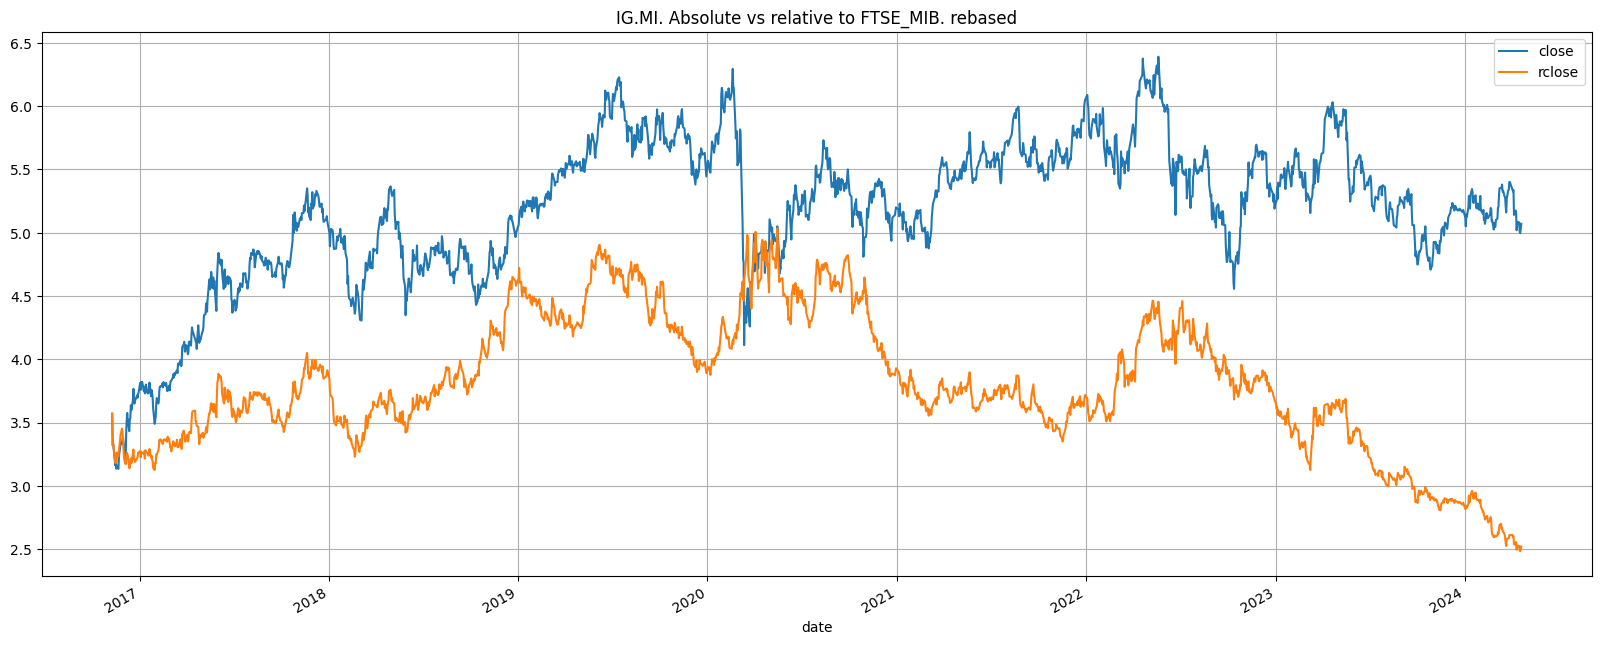

In [11]:
plot_abs_rel(df, ticker, bm_df, bm_name)

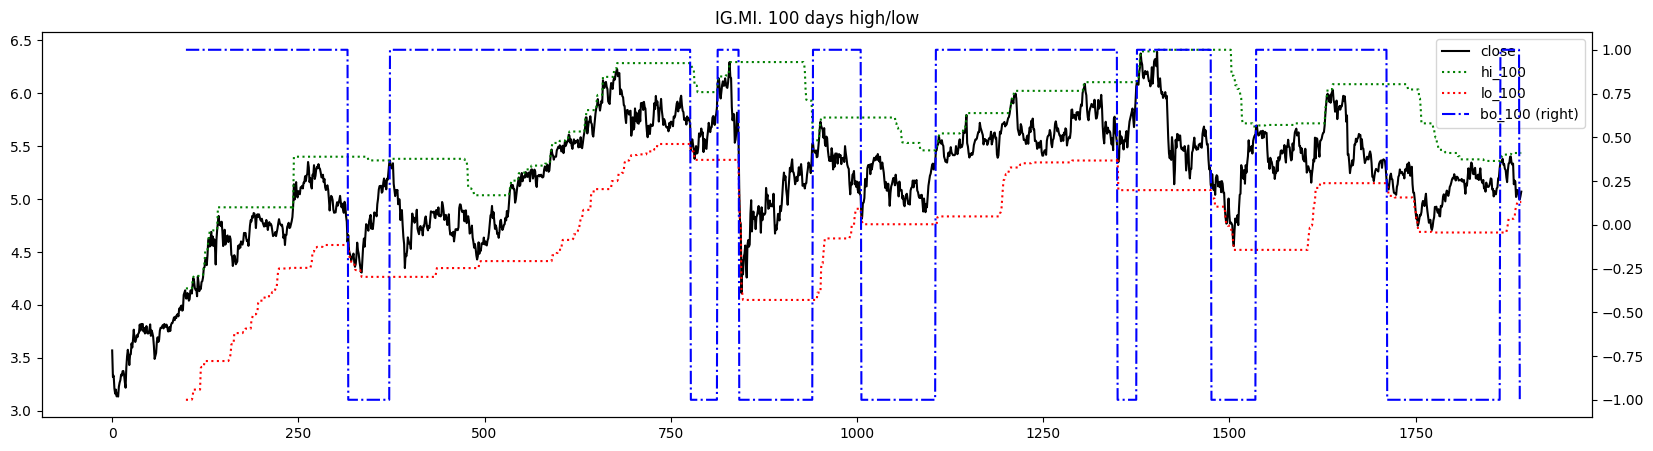

In [12]:
window_bo = 100
df_bo = df.copy()
df_bo = signal_bo(df_bo, window_bo)
bo_signal = 'bo_' + str(window_bo)
plot_signal_bo(df_bo, window_bo, ticker)

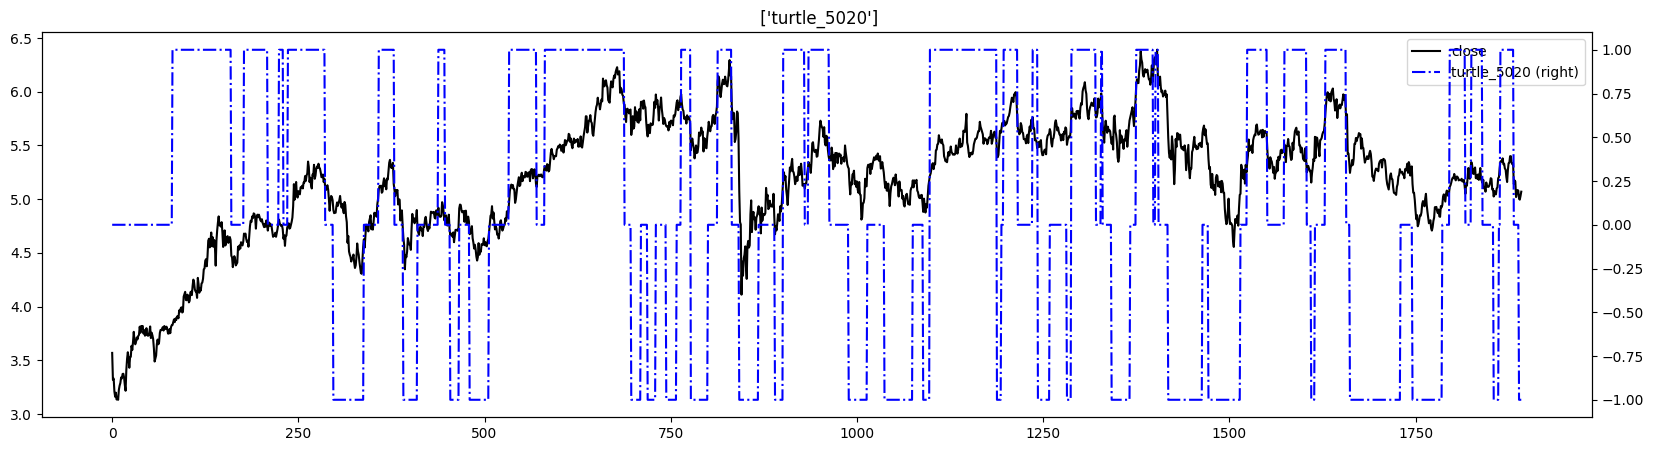

In [13]:
fast = 20
slow = 50
df_tt = df.copy()
df_tt = signal_tt(df_tt, fast = fast, slow = slow)
tt_signal = 'turtle_' + str(slow) + str(fast)
plot_signal_tt(df_tt, fast, slow)

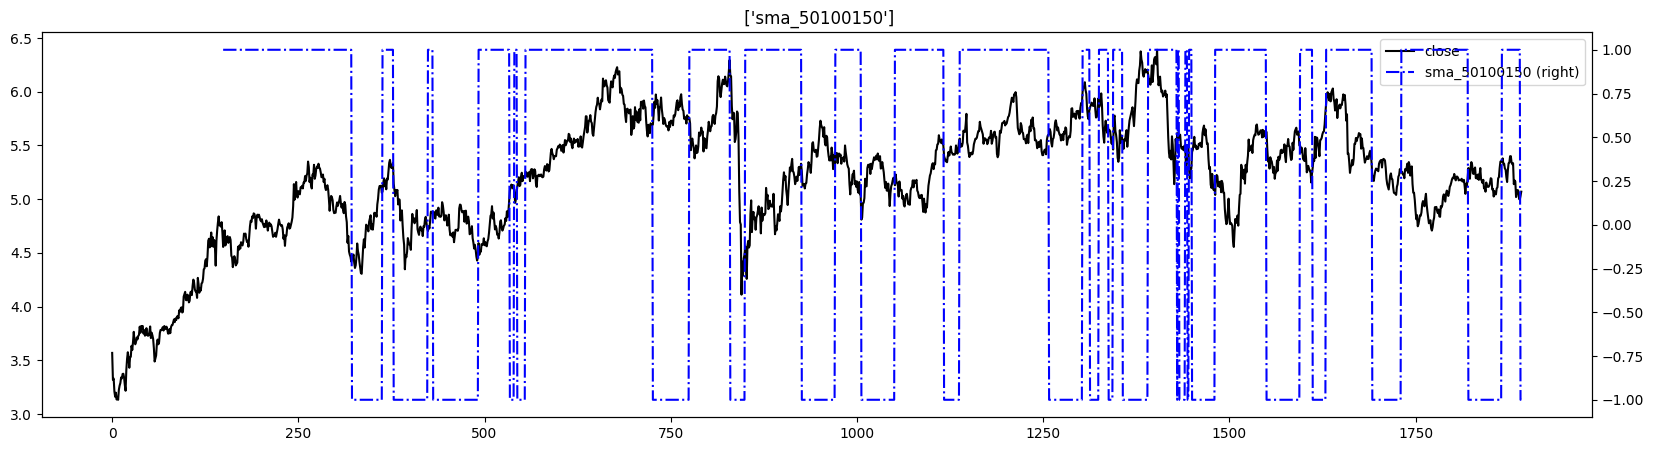

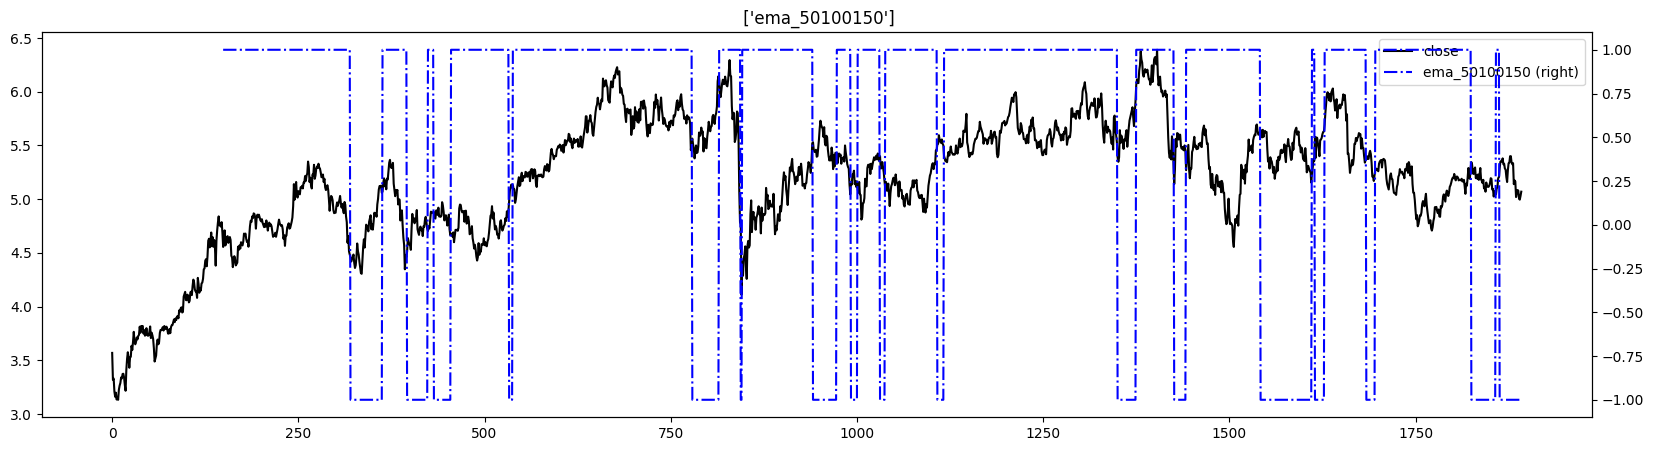

In [14]:
st = 50
mt = 100
lt = 150
df_ma = df.copy()
df_ma = signal_sma(df_ma, st, mt, lt)
df_ma = signal_ema(df_ma, st, mt, lt)

sma_signal = 'sma_' + str(st) + str(mt) + str(lt)
ema_signal = 'ema_' + str(st) + str(mt) + str(lt)

plot_signal_ma(df_ma, st, mt, lt)

In [15]:
df_fc

date   open   high    low  close  adj_close   volume
0   2023-04-03  5.625  5.650  5.605  5.630   5.321760   804185
1   2023-04-04  5.630  5.695  5.620  5.695   5.383202  1007673
2   2023-04-05  5.695  5.860  5.695  5.805   5.487179  1756028
3   2023-04-06  5.780  5.895  5.770  5.895   5.572251  1703140
4   2023-04-11  5.870  5.975  5.865  5.975   5.647871  1664843
..         ...    ...    ...    ...    ...        ...      ...
260 2024-04-12  5.040  5.140  5.030  5.085   5.085000  2744598
261 2024-04-15  5.100  5.120  5.070  5.080   5.080000  2482203
262 2024-04-16  5.060  5.080  4.982  5.005   5.005000  3057804
263 2024-04-17  4.996  5.055  4.972  4.996   4.996000  3984073
264 2024-04-18  5.035  5.050  4.982  5.030   5.030000  2044106

[265 rows x 7 columns]

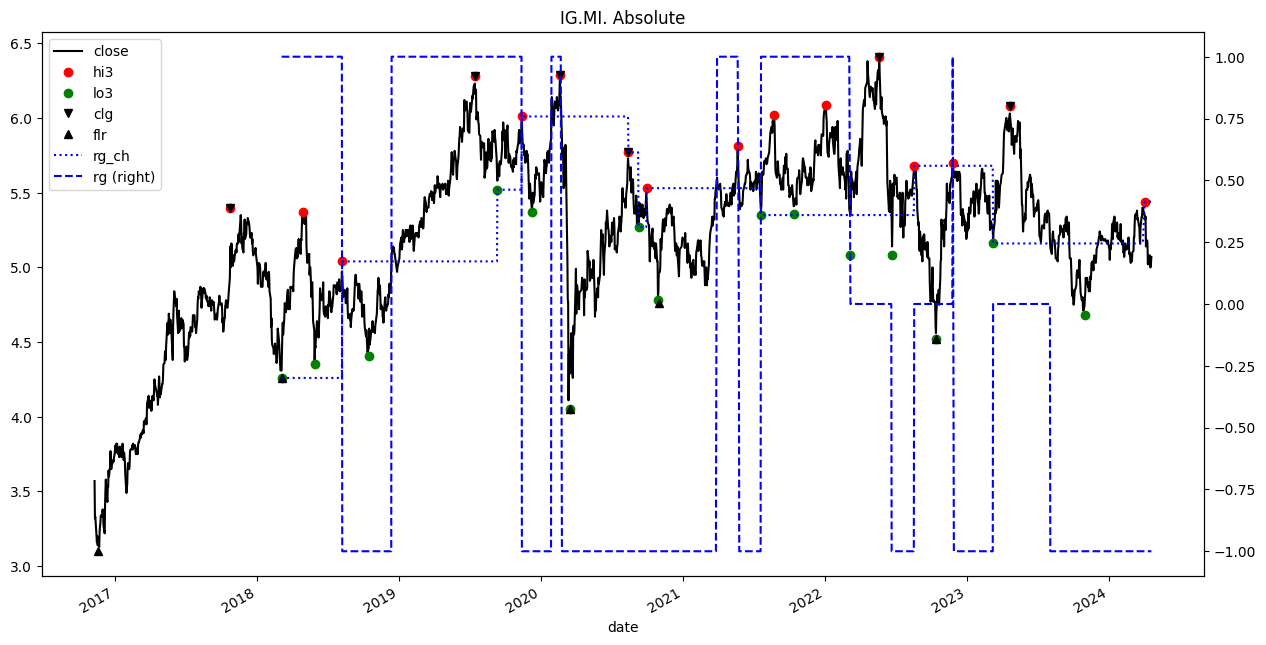

In [16]:
df_fc = df.copy()
df_fc = detect_regime(df_fc, bm_df)
fc_signal = 'rg'
fcr_signal = 'rrg'
plot_signal_abs(df_fc, ticker)

1
1


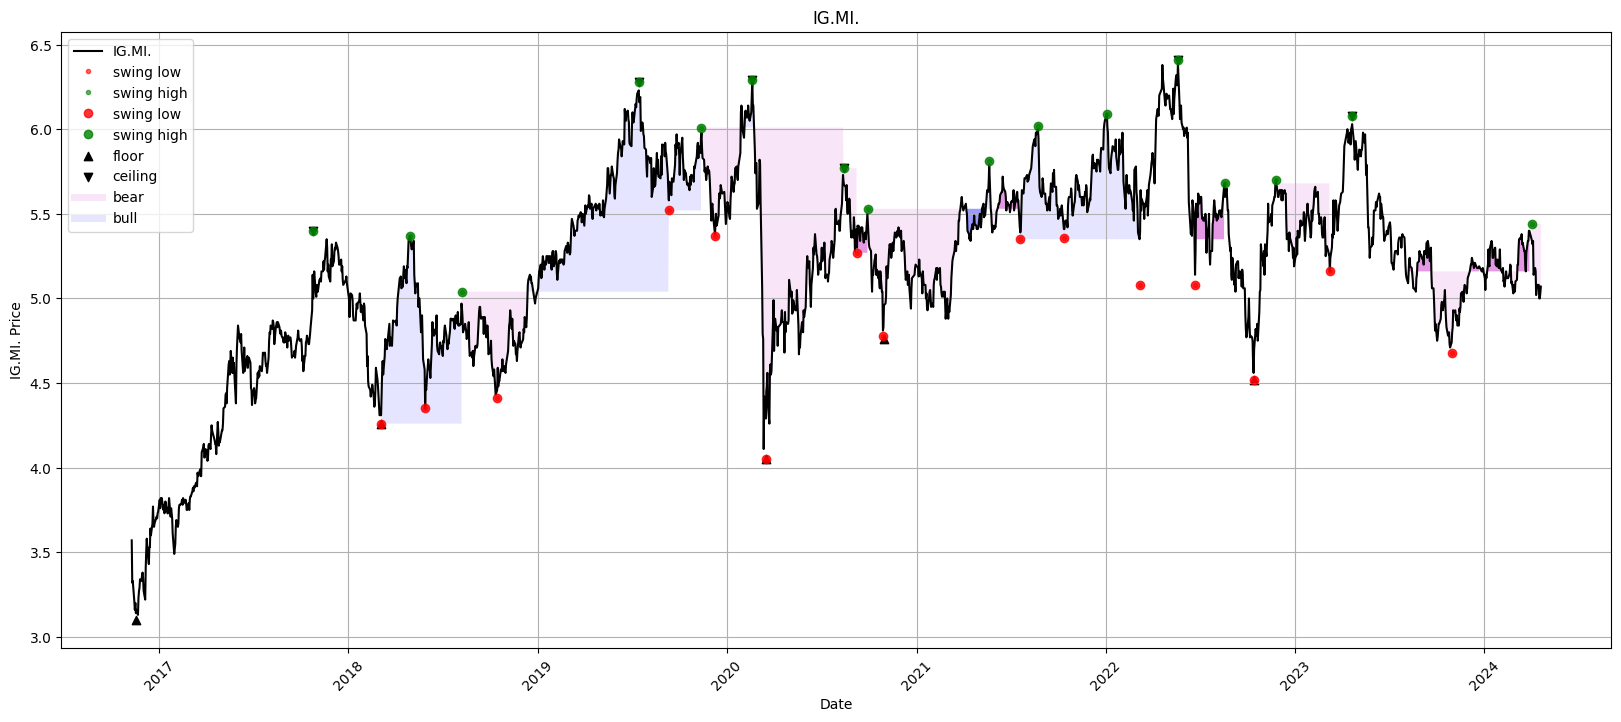

In [17]:
plot_regime_abs(df_fc, ticker)

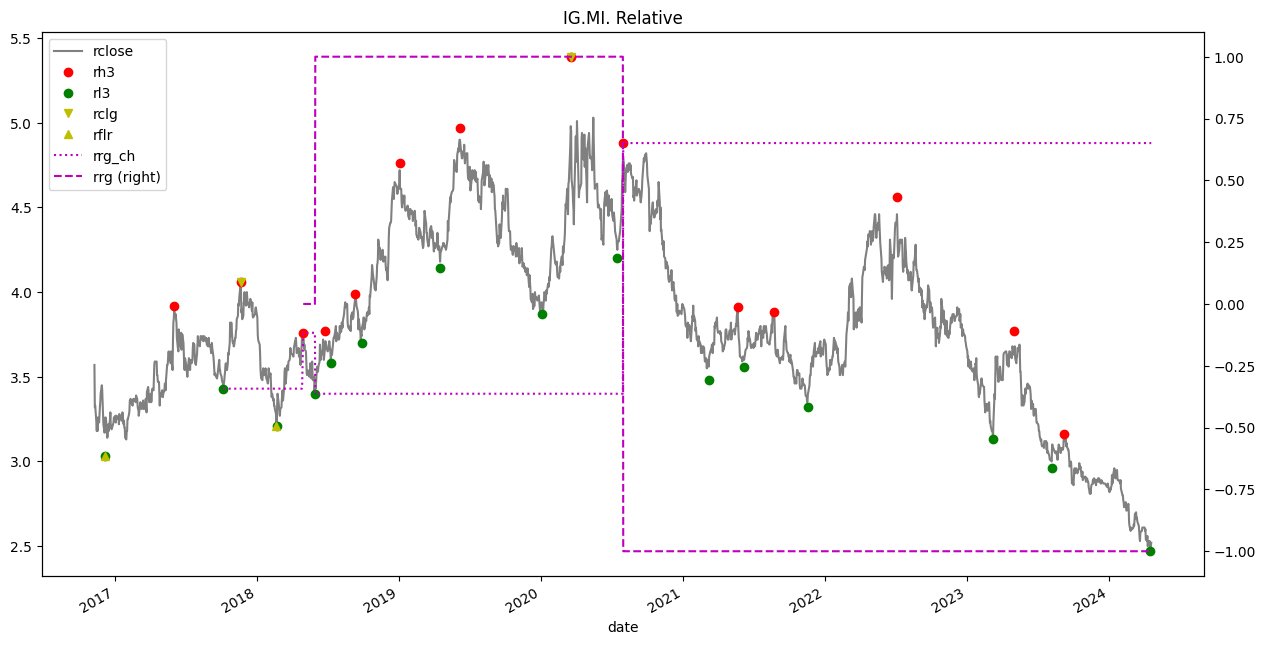

In [18]:
plot_signal_rel(df_fc, ticker)

1
1


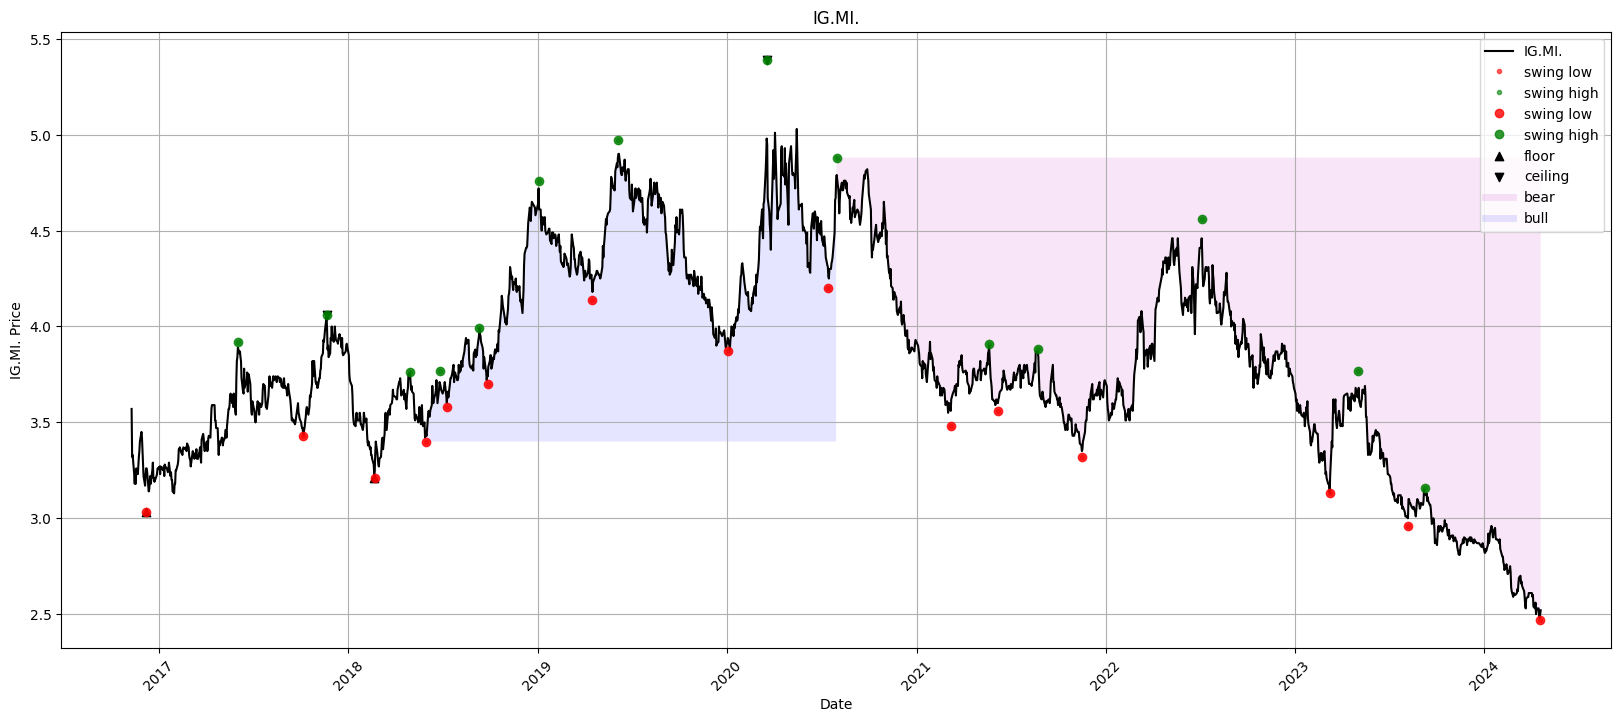

In [19]:
plot_regime_rel(df_fc, ticker)

In [20]:
method = ['breakout', 'turtle', 'sma', 'ema', 'floor_ceiling', 'floor_ceiling_relative']
signal = [bo_signal, tt_signal, sma_signal, ema_signal, fc_signal, fcr_signal]
df_signal = [df_bo, df_tt, df_ma, df_ma, df_fc, df_fc]

# method = ['turtle']
# signal = [tt_signal]
# df_signal = [df_tt]

In [21]:
def get_df_signal(df_signal, signal, window_exp):
    df_signal = df_signal.copy()
    df_signal = get_returns(df_signal, signal)
    df_signal = get_expectancies(df_signal, window_exp)
    return df_signal
    

In [22]:
window_exp = 100  # set the value of window_exp  
output_signals = []  # create an empty list to hold the output dataframes  
  
for i in range(len(signal)):  
    df = df_signal[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    output_df = get_df_signal(df, s, window_exp)  # call the function on the ith dataframe and signal  
    output_df['method'] = str(m)  # create a new column in output_df with the signal name  
    output_signals.append(output_df)  # append the output dataframe to the list  
  
# output_signals now contains the processed dataframes with the signal column added  


In [23]:
output_df_sel = pd.concat(output_signals, axis=0)  
output_df_sel = output_df_sel[['method', 'close', 'stop_loss','tt_cumul']]
output_df_sel.groupby('method').last() 

close  stop_loss  tt_cumul
method                                            
breakout                 5.07      5.435 -0.723477
ema                      5.07      5.435  0.036131
floor_ceiling            5.07      5.440  0.332897
floor_ceiling_relative   5.07      5.440  0.308745
sma                      5.07      5.435  0.183783
turtle                   5.07      5.435 -0.468233

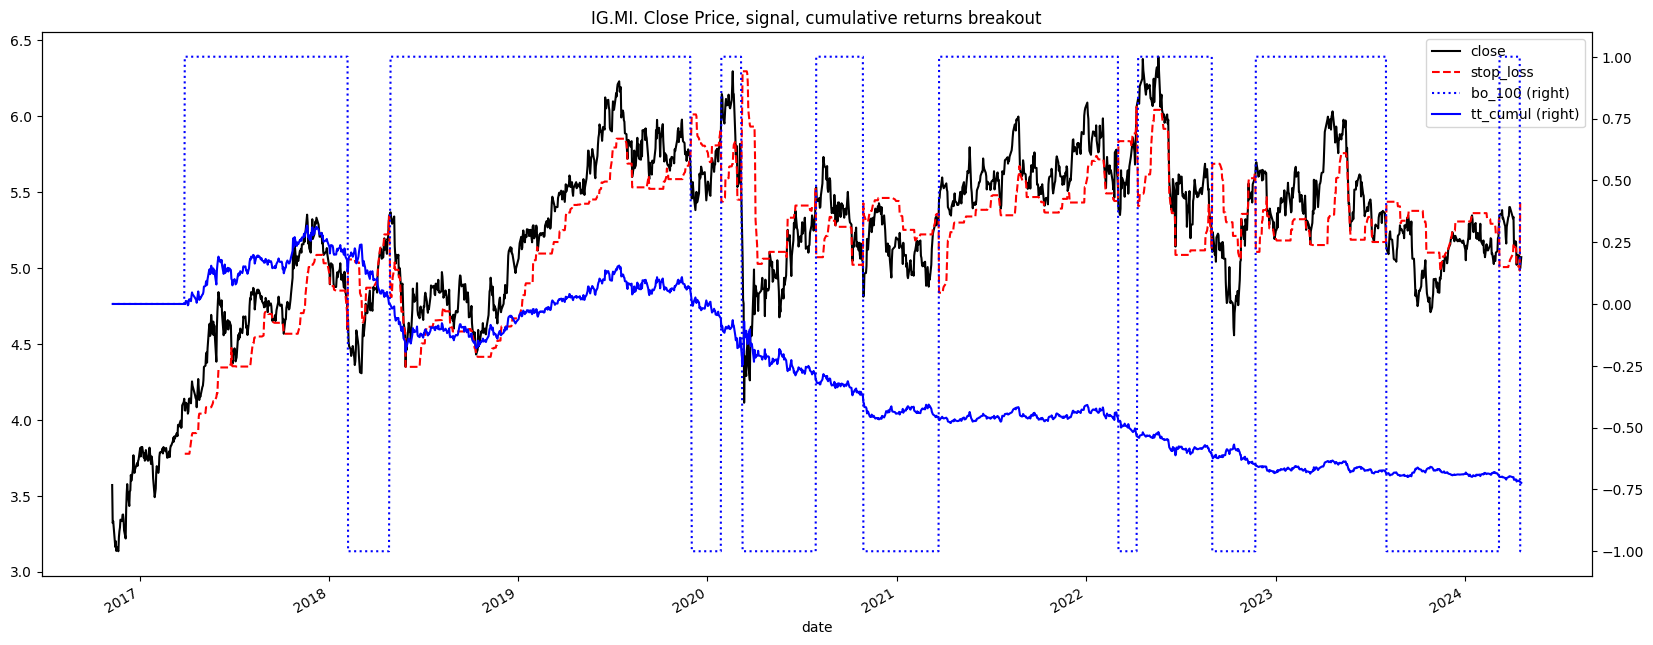

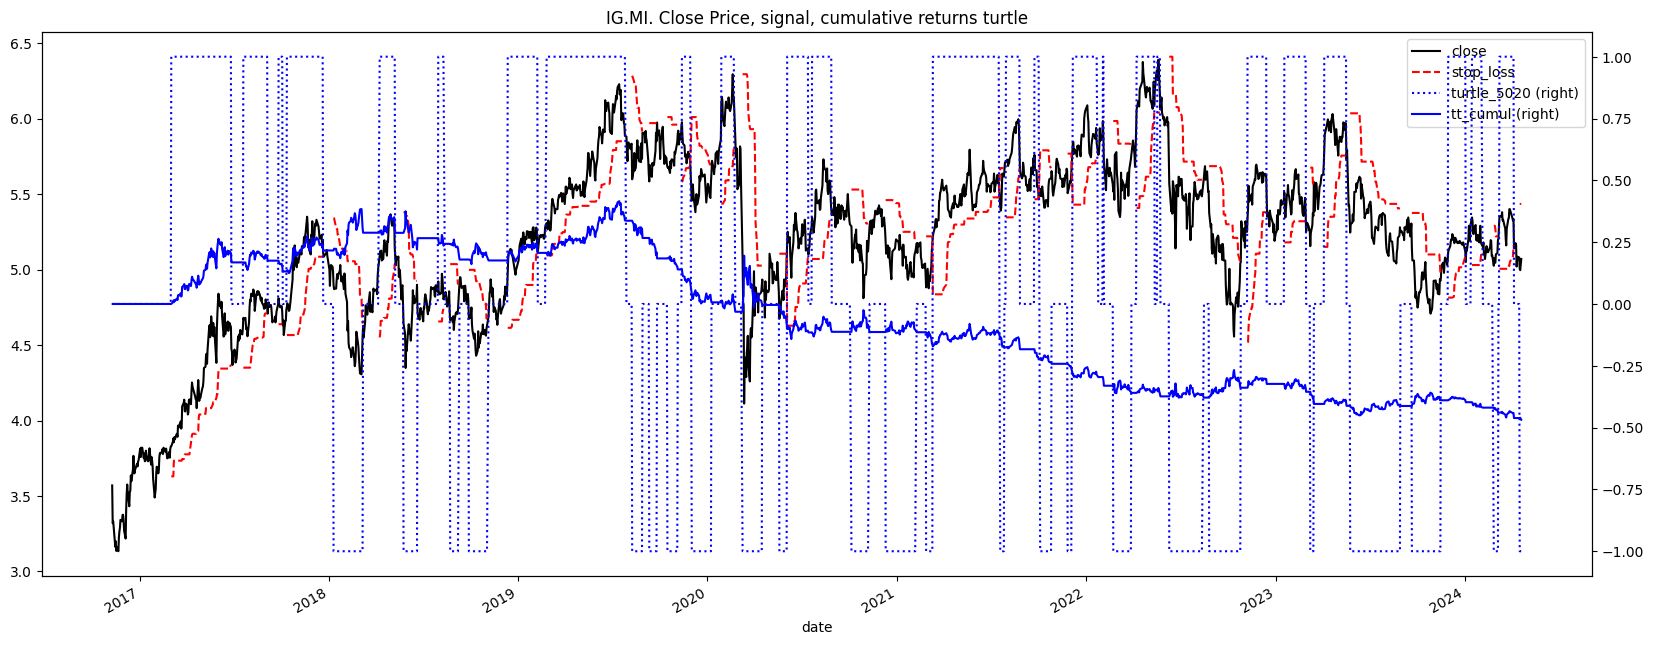

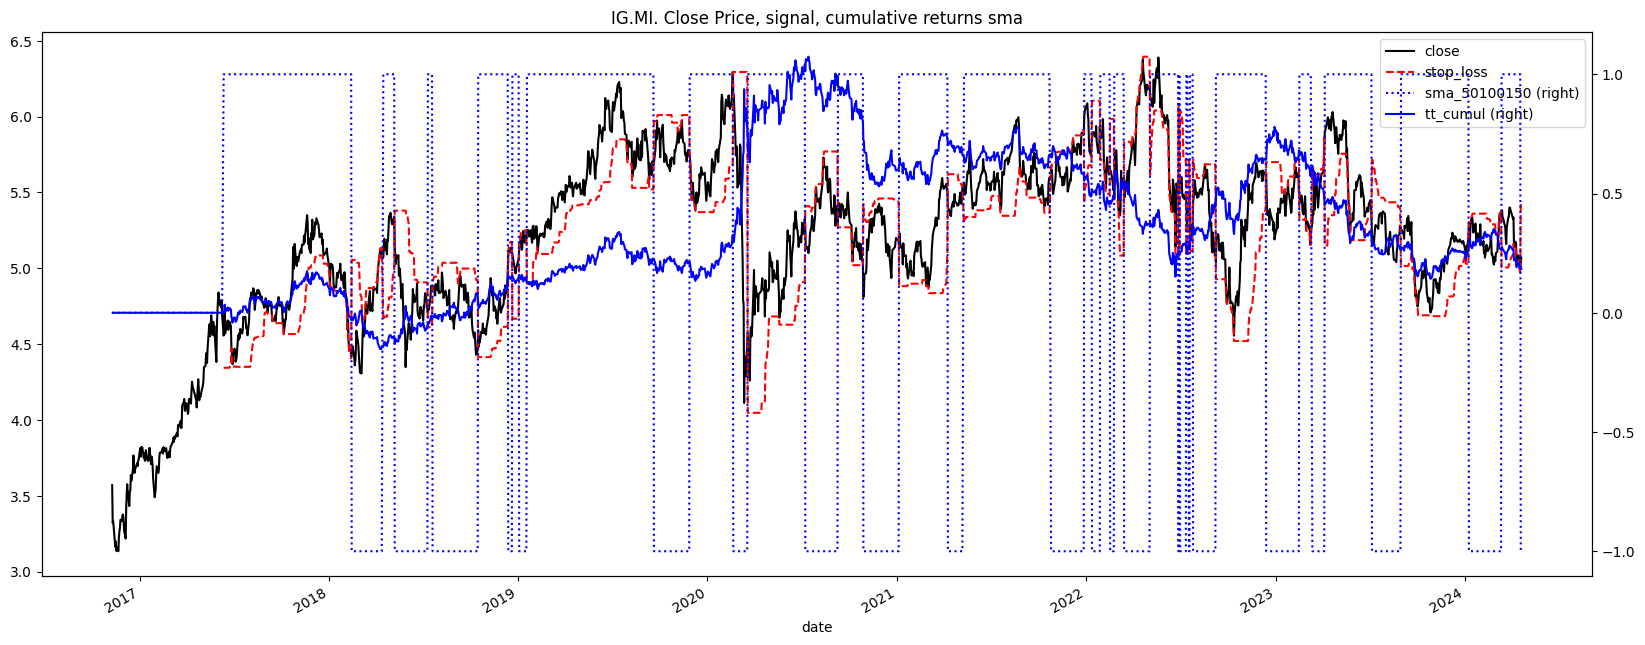

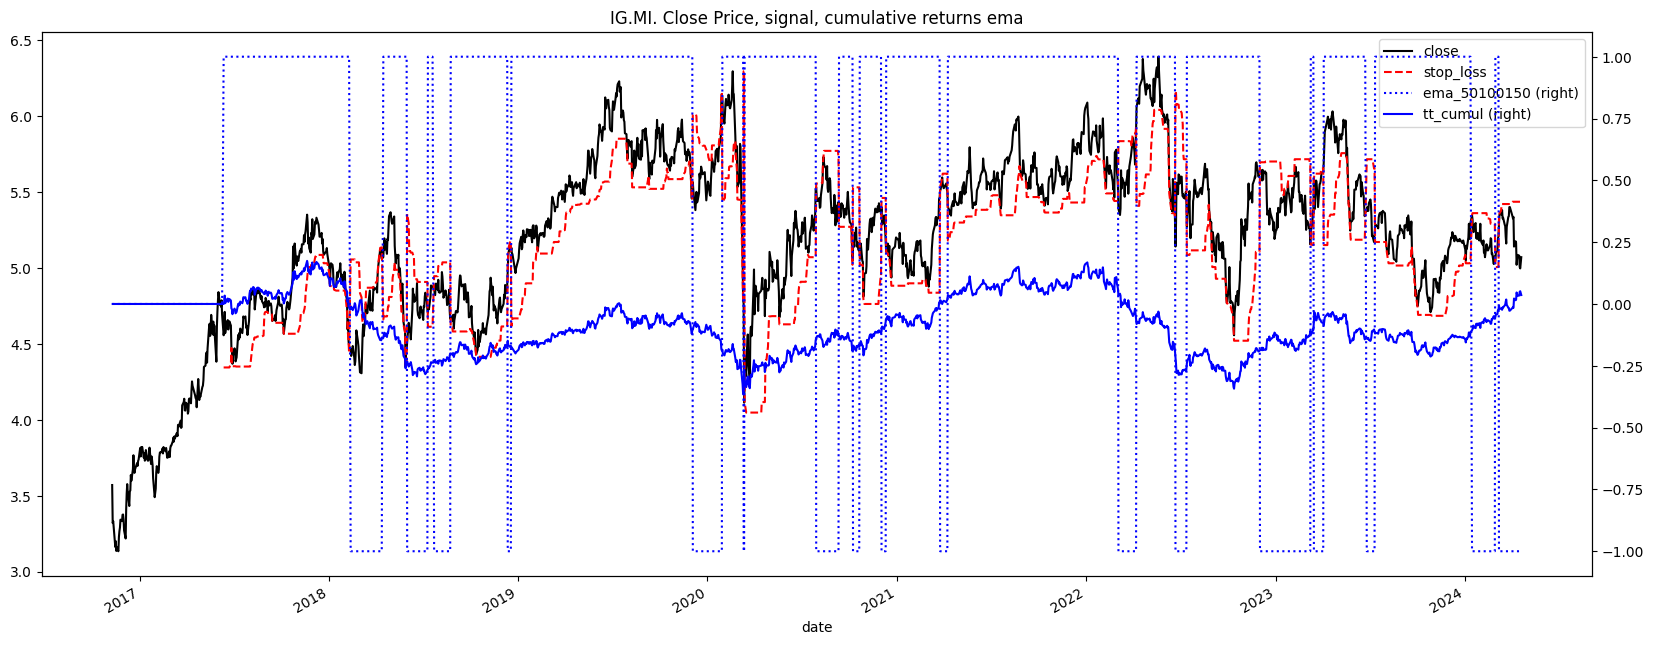

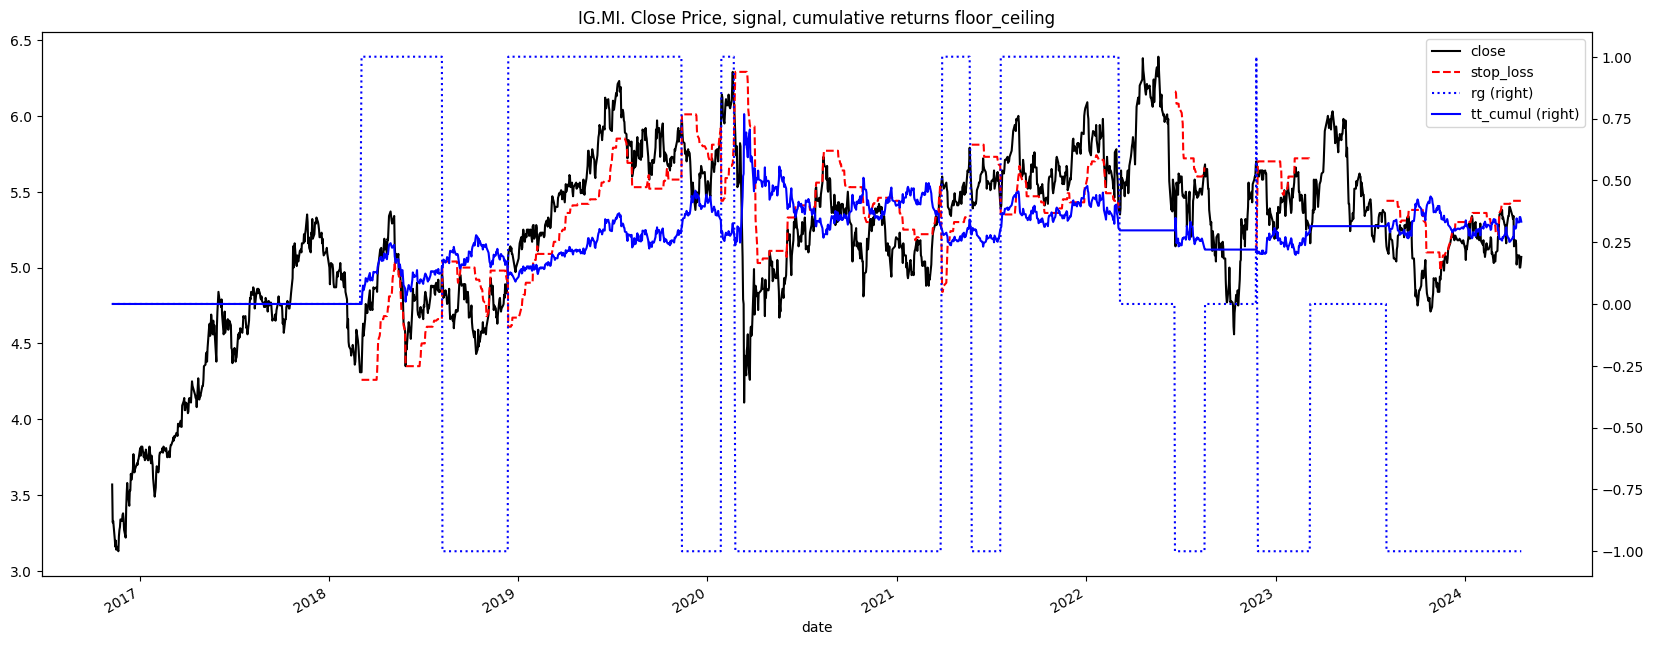

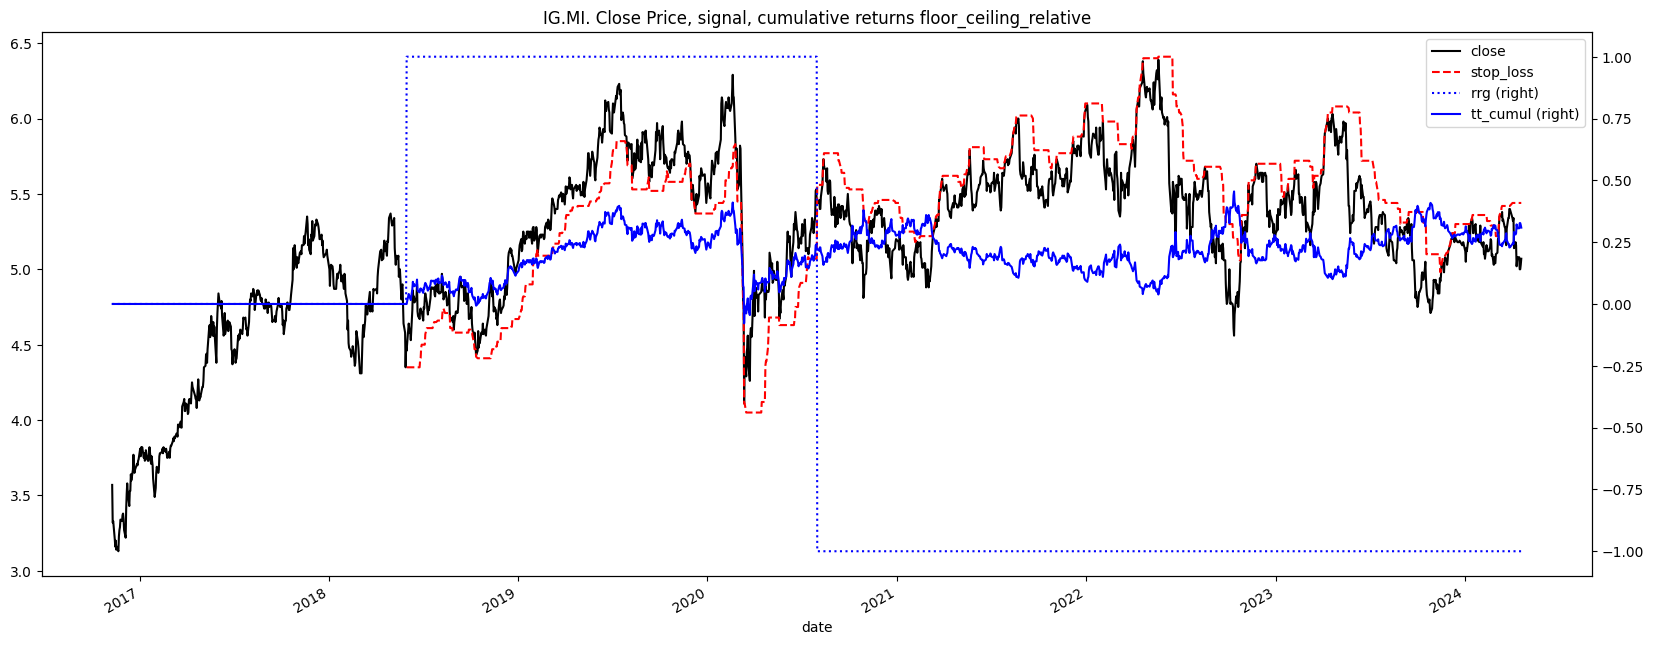

In [24]:
for i in range(len(signal)):  
    # print(i)
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    plot_price_signal_cumreturns(df, ticker, s, m)

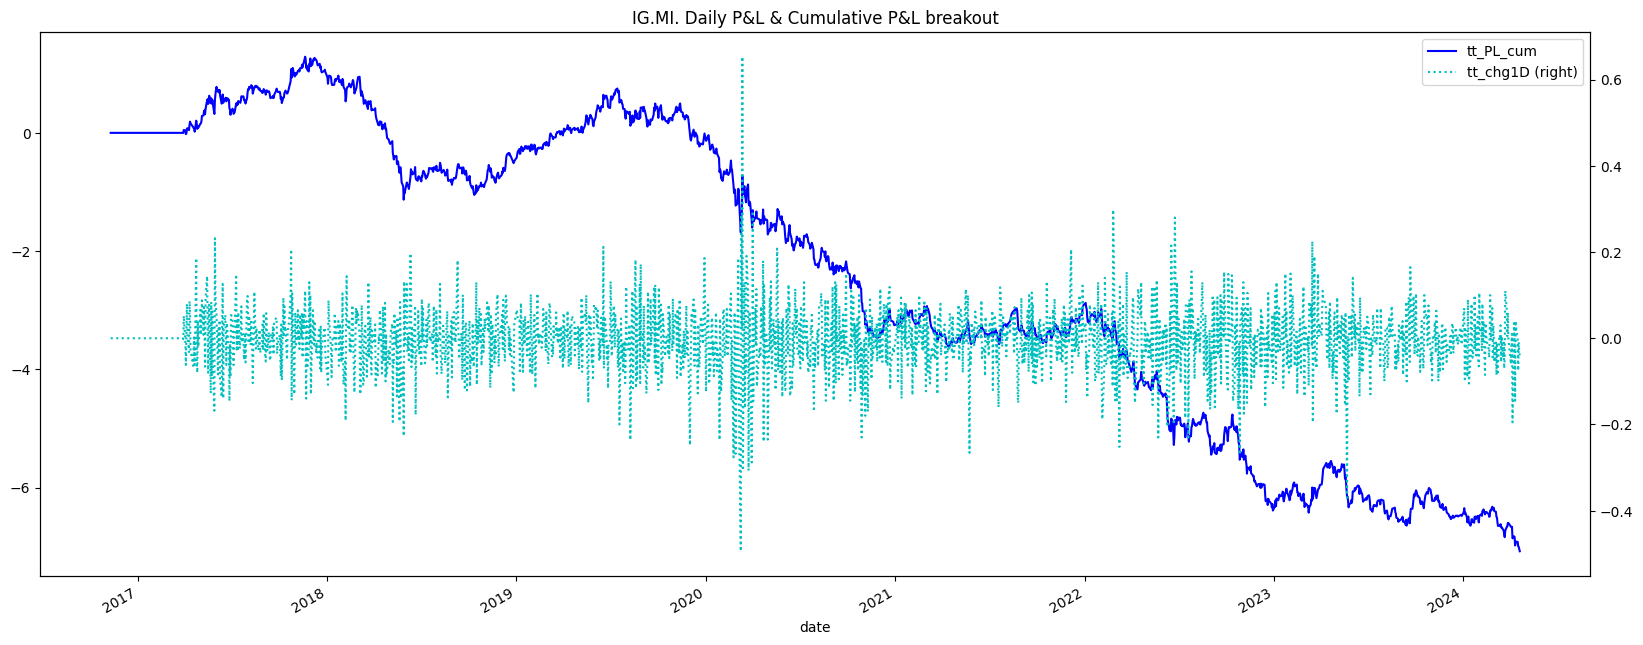

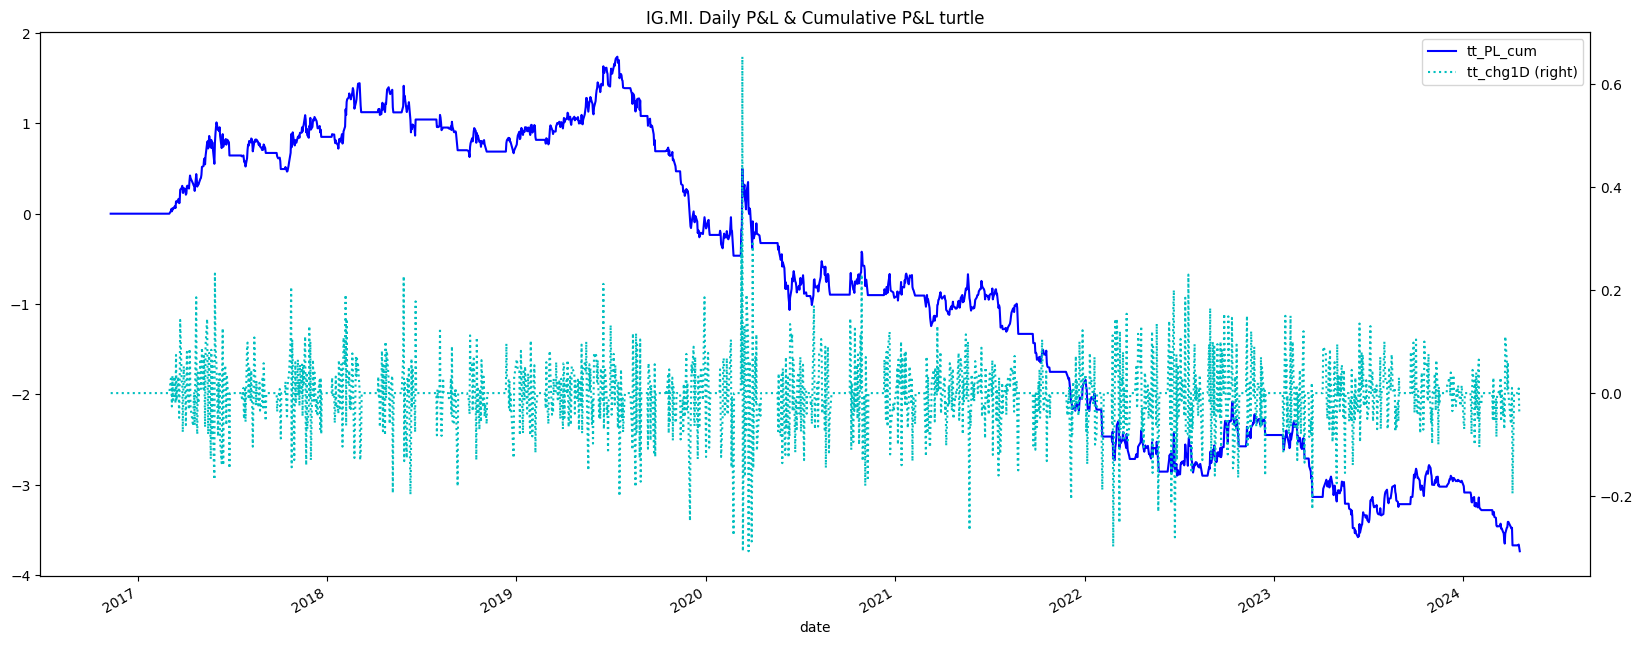

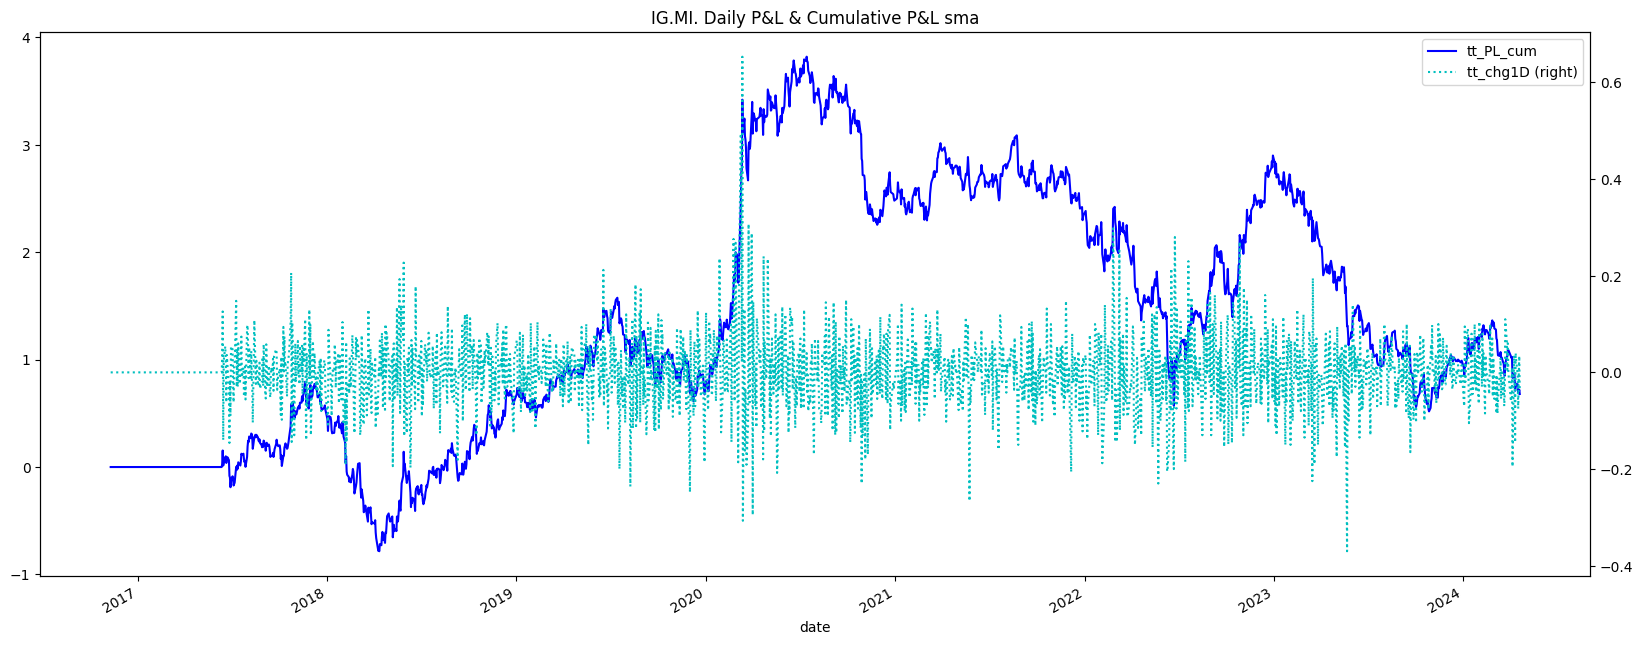

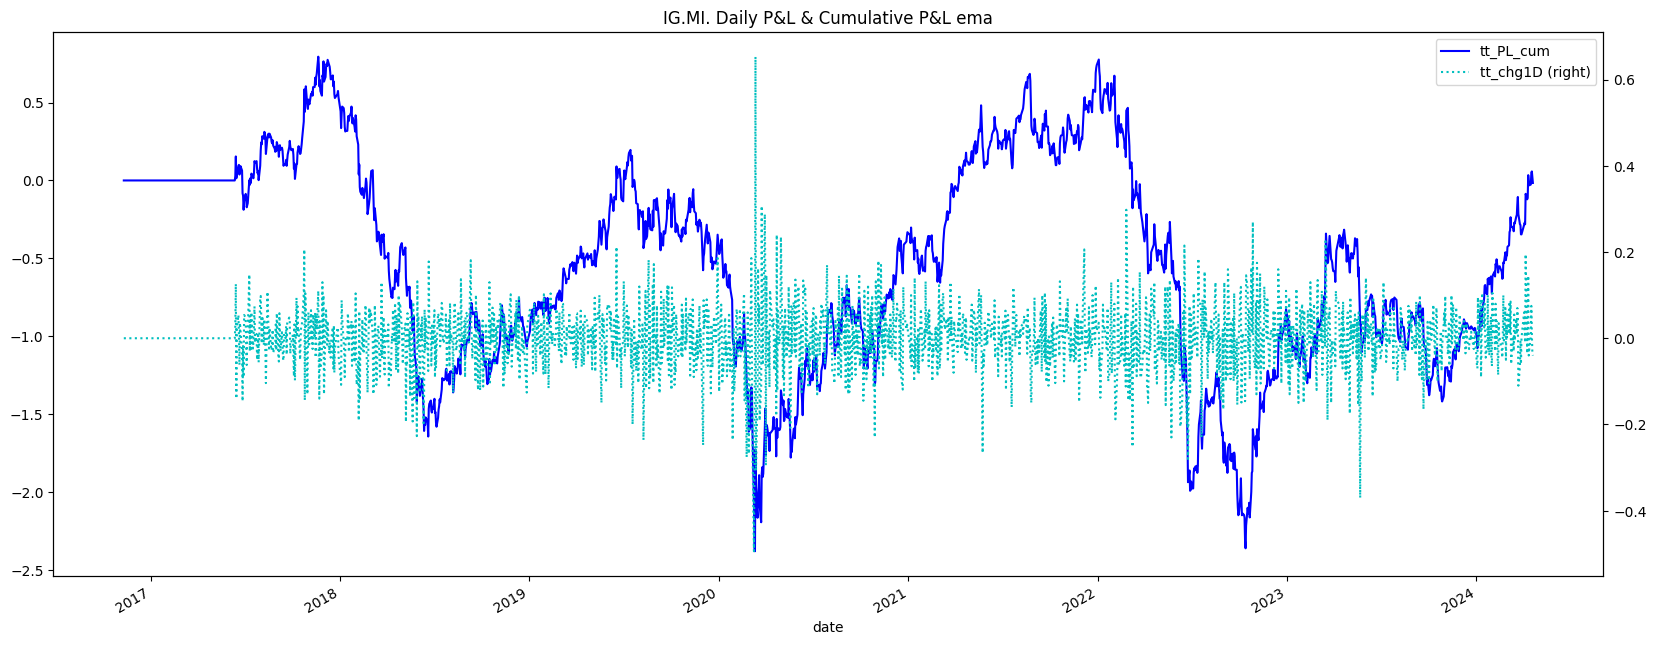

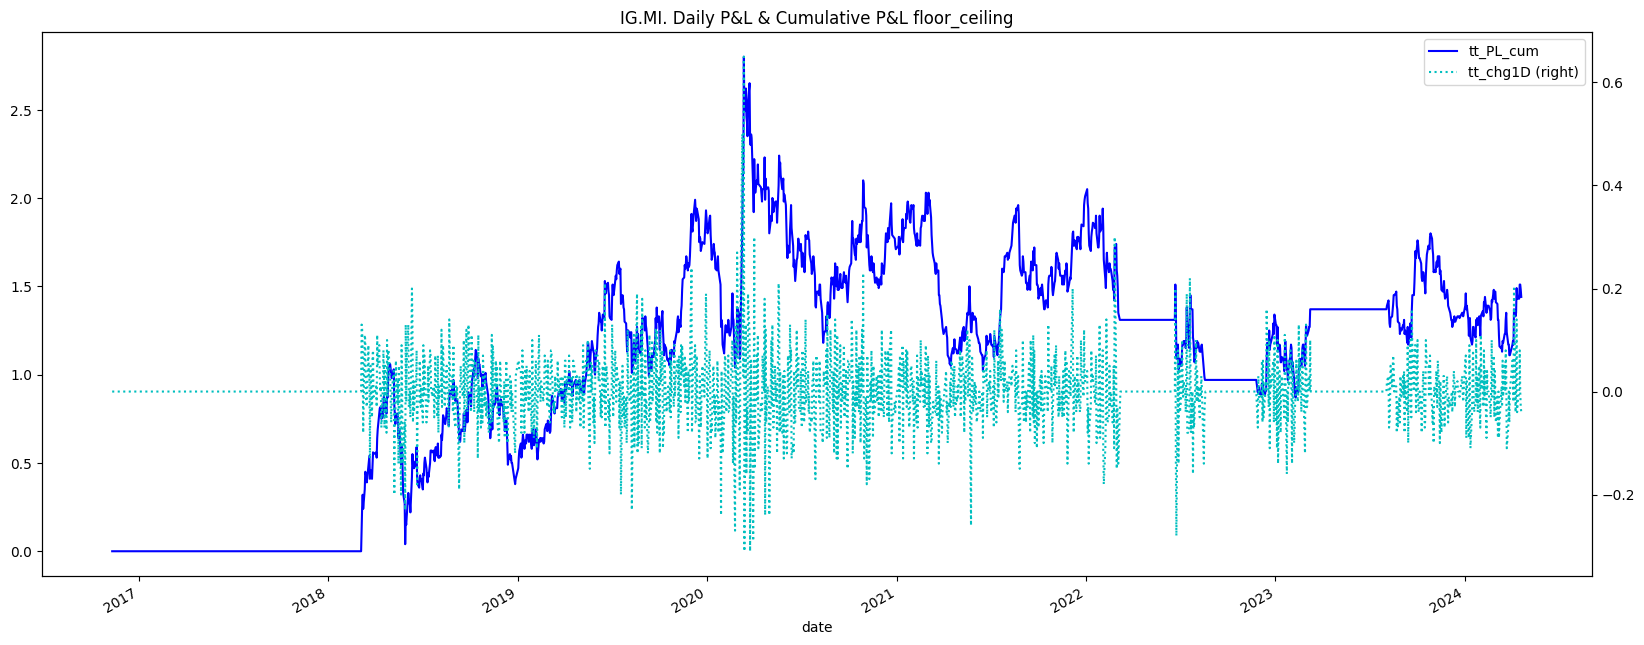

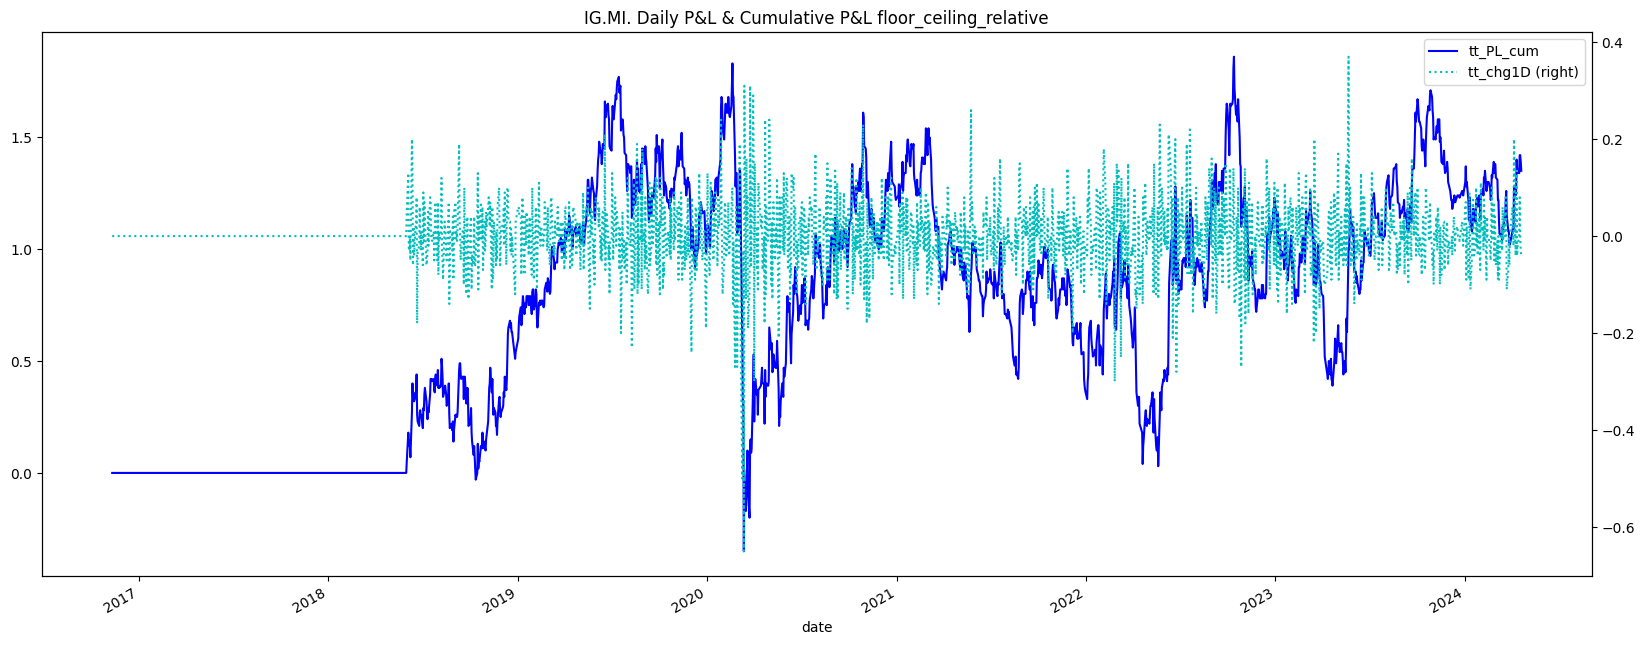

In [25]:
for i in range(len(signal)):  
    # print(i)
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    plot_PL(df, ticker, m)

In [26]:
output_df_sel = pd.concat(output_signals, axis=0)  
output_df_sel = output_df_sel[['method', 'trading_edge','geometric_expectancy','kelly']]
output_df_sel.groupby('method').last() 

trading_edge  geometric_expectancy       kelly
method                                                                
breakout                   -0.000826             -0.000833  -59.503409
ema                         0.001598              0.001591  119.688070
floor_ceiling               0.000391              0.000383   26.947810
floor_ceiling_relative      0.000391              0.000383   26.947810
sma                        -0.000126             -0.000133   -8.818833
turtle                     -0.000005             -0.000007   -1.288955

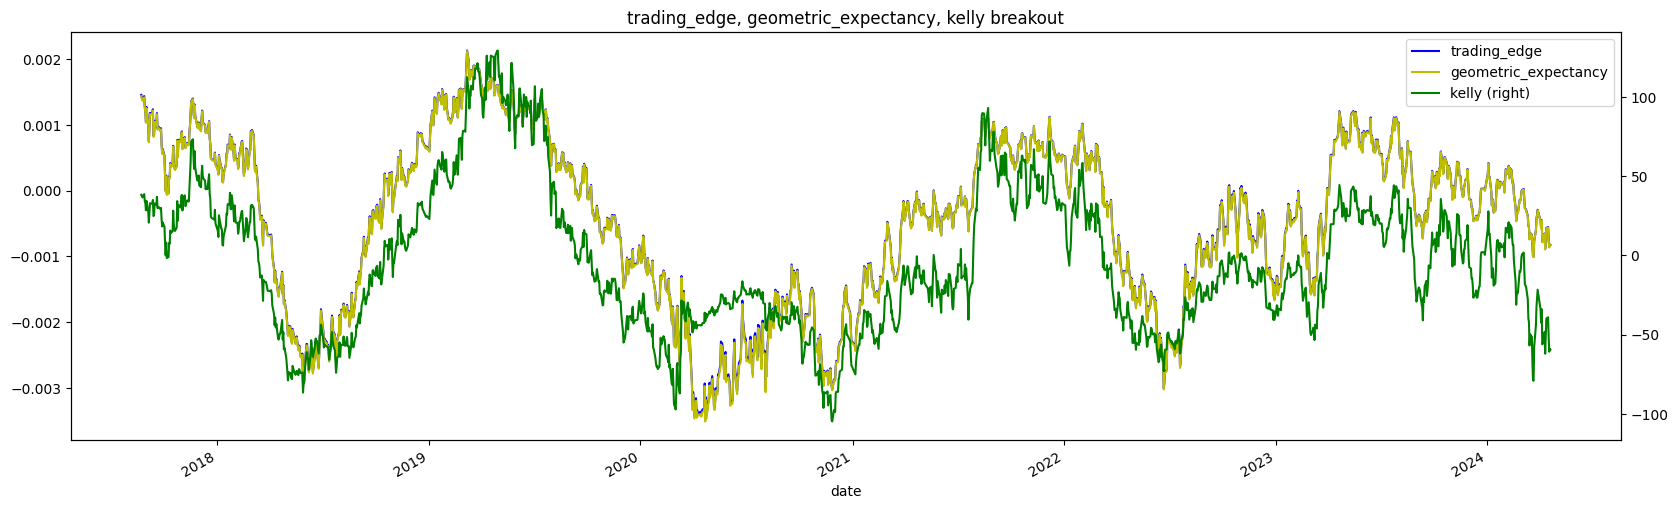

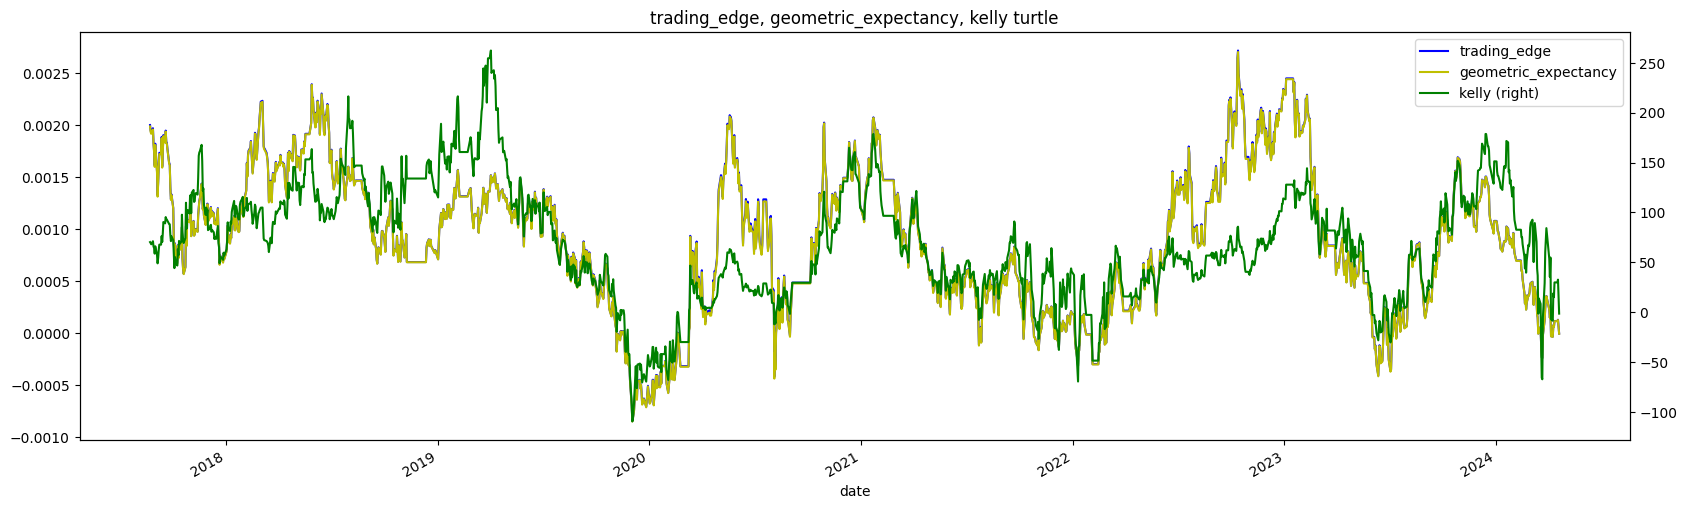

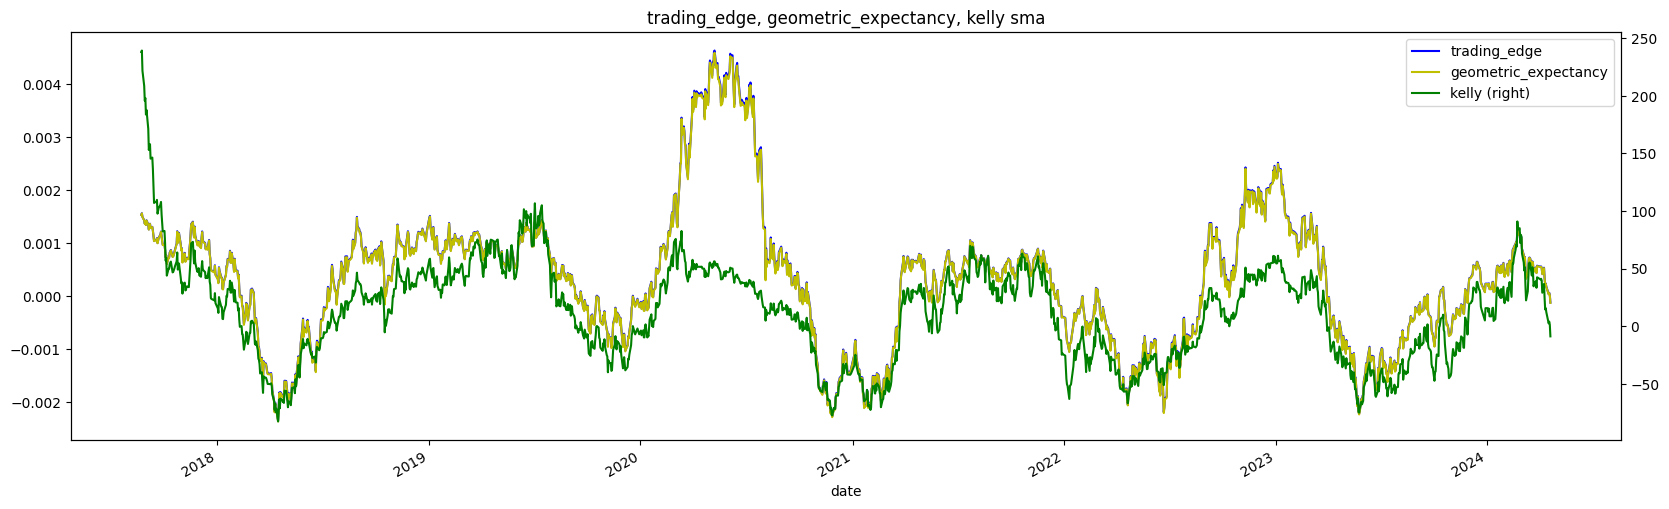

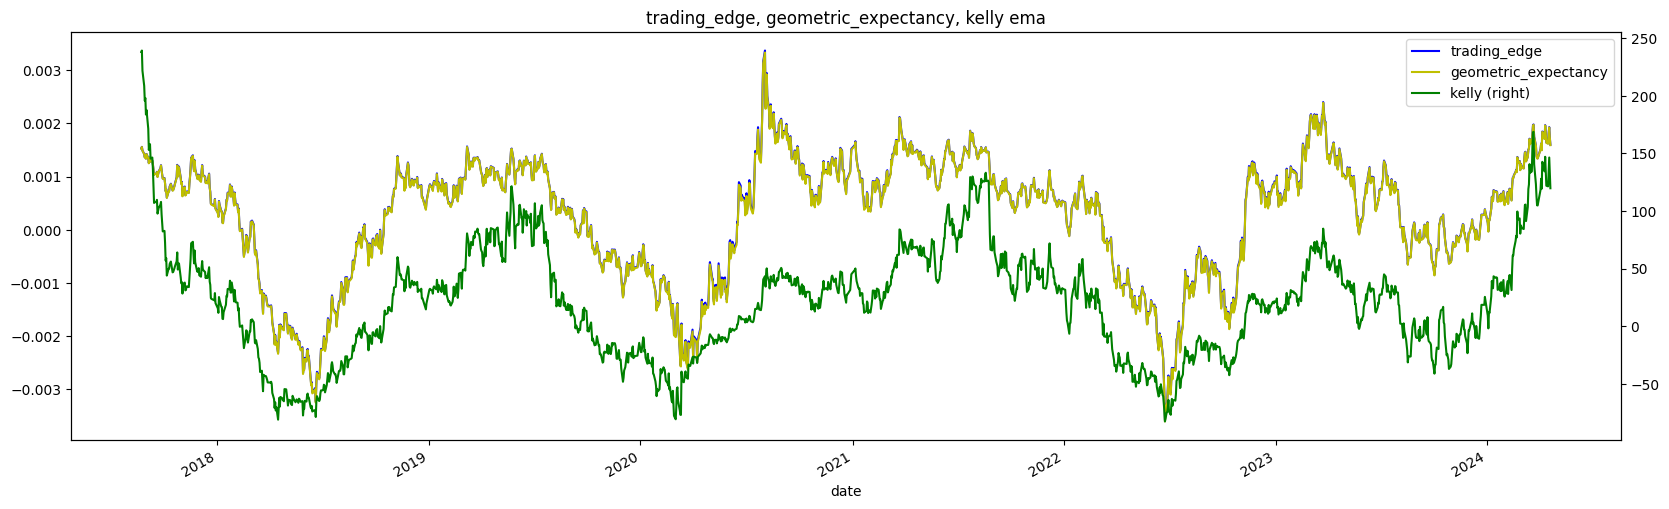

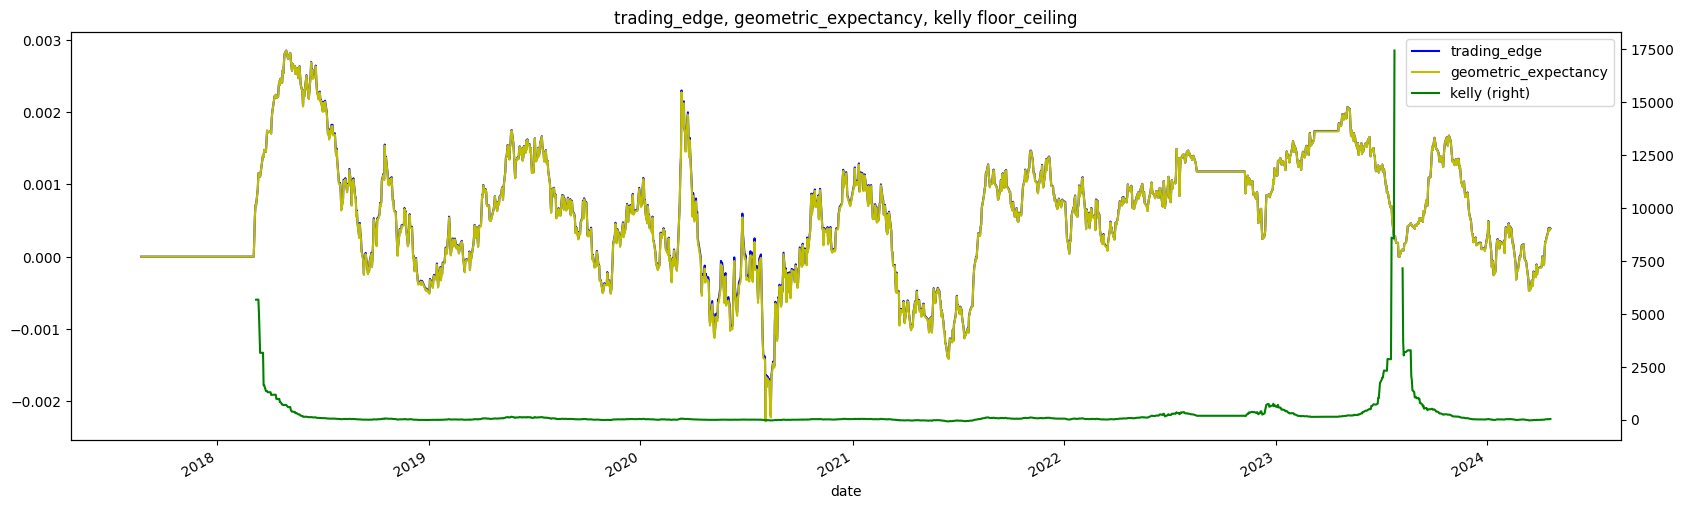

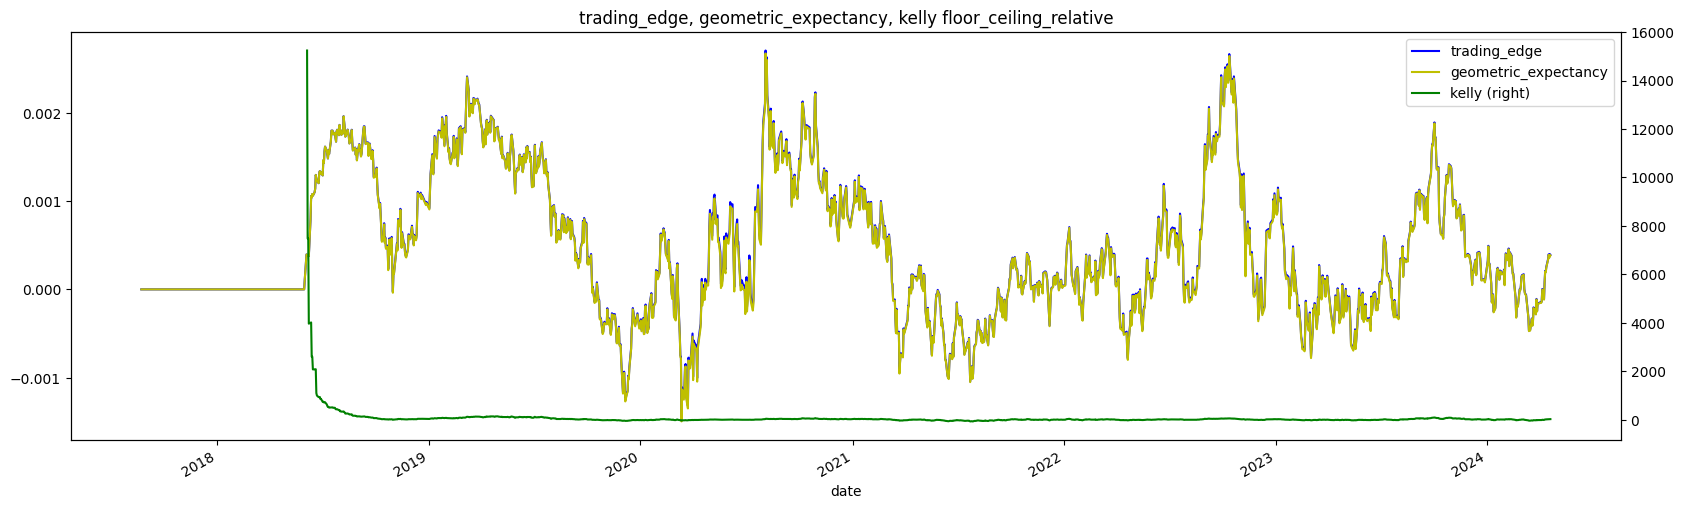

In [27]:
for i in range(len(signal)):  
    # print(i)
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    plot_expectancies(df, window_exp, m)

In [28]:
starting_capital = 100000
lot = 100
mn = -0.0025
mx = -0.0075
# avg = (mn + mx) / 2
tolerance= -0.1
equal_weight = 0.05
span= 5
fx = 1

In [29]:

for i in range(len(signal)):  
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    output_df = get_equity_risk(df, tolerance, mn, mx, span)  # call the function on the ith dataframe and signal  
    output_signals.append(output_df)  # append the output dataframe to the list  


In [30]:

for i in range(len(signal)):  
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    output_df = get_shares(df, starting_capital, lot, mn, mx, tolerance, equal_weight, span, fx, s)
    output_signals.append(output_df)  # append the output dataframe to the list  


In [31]:
output_df_sel = pd.concat(output_signals, axis=0)  
output_df_sel = output_df_sel[['method', 'constant','concave','convex','equal_weight', 'tt_PL_cum_fx']]
output_df_sel.groupby('method').last() 

constant   concave    convex  equal_weight  \
method                                                               
breakout                 87970.8   81602.4   81602.4       91508.8   
ema                      99963.2   99944.0   99944.0       99984.0   
floor_ceiling           112732.0  118796.0  118796.0      101504.0   
floor_ceiling_relative  106075.0  109180.0  109180.0      101485.0   
sma                     101564.0  102380.0  102380.0      100680.0   
turtle                  102984.5  104467.2  103788.0       97155.0   

                        tt_PL_cum_fx  
method                                
breakout                      -7.076  
ema                           -0.016  
floor_ceiling                  1.440  
floor_ceiling_relative         1.350  
sma                            0.680  
turtle                        -3.735

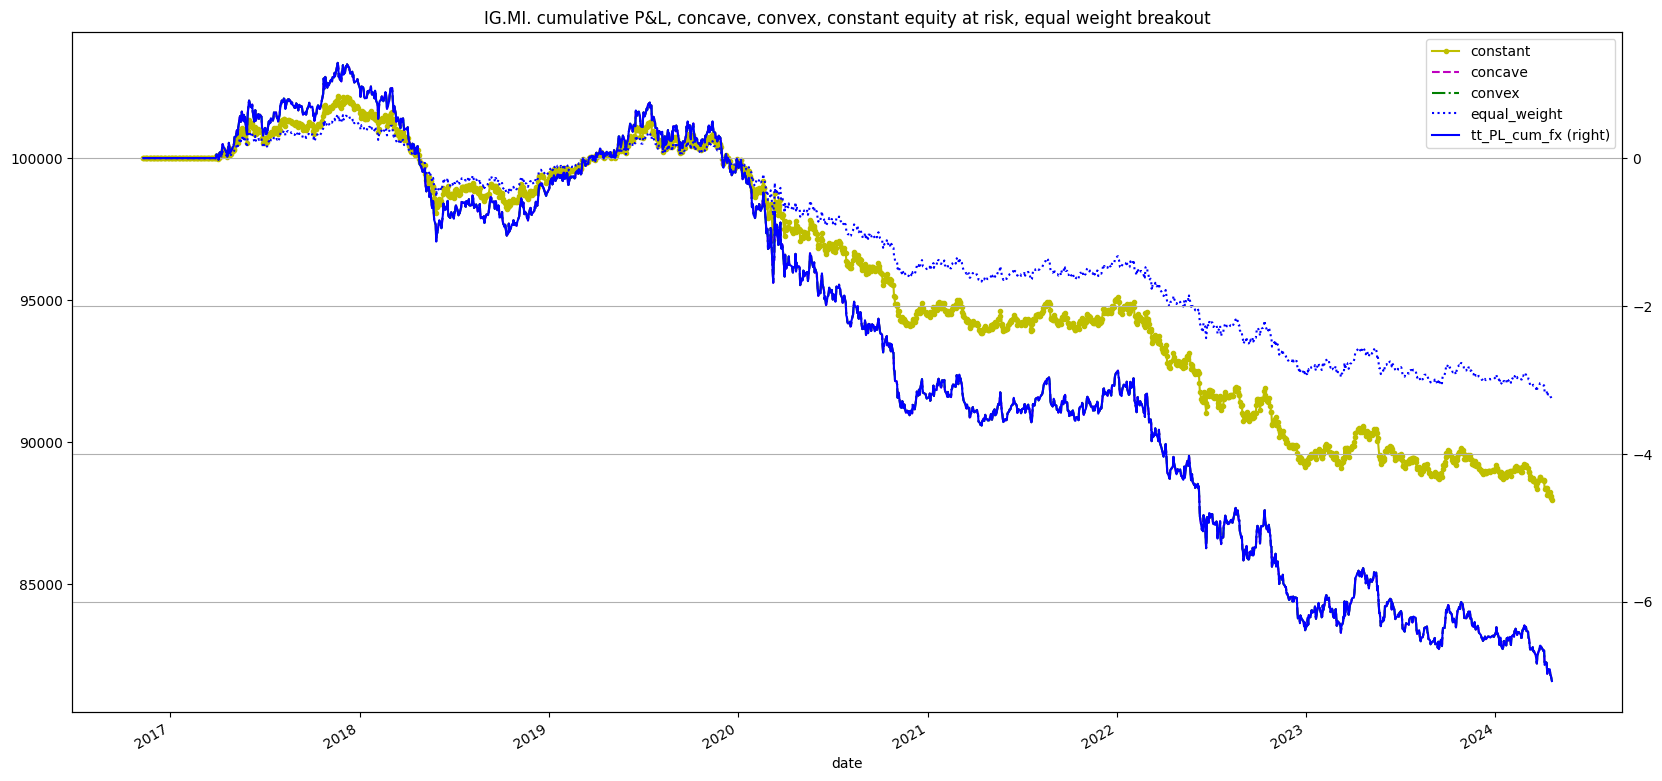

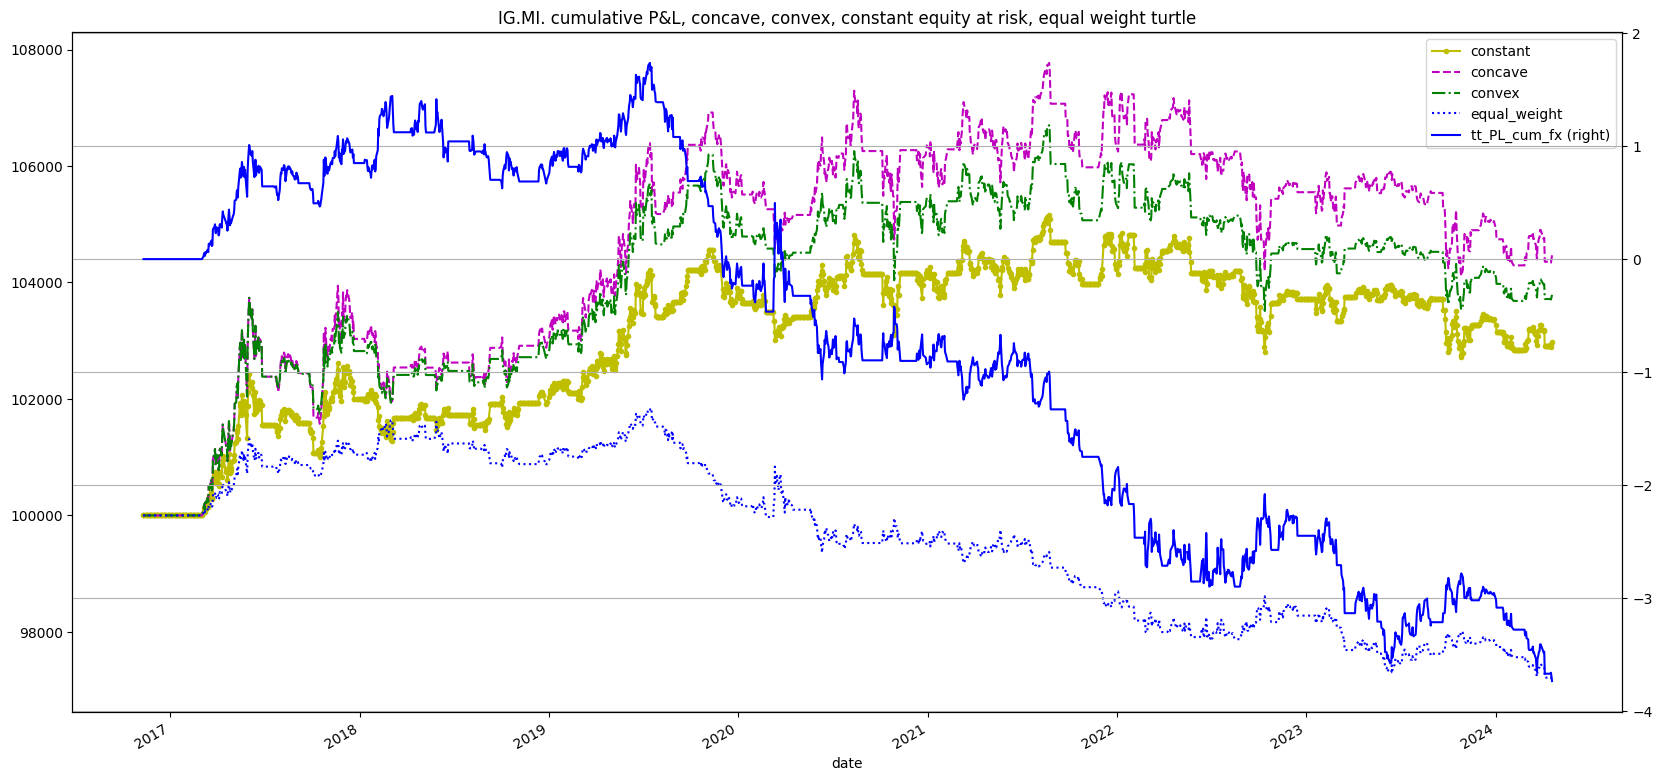

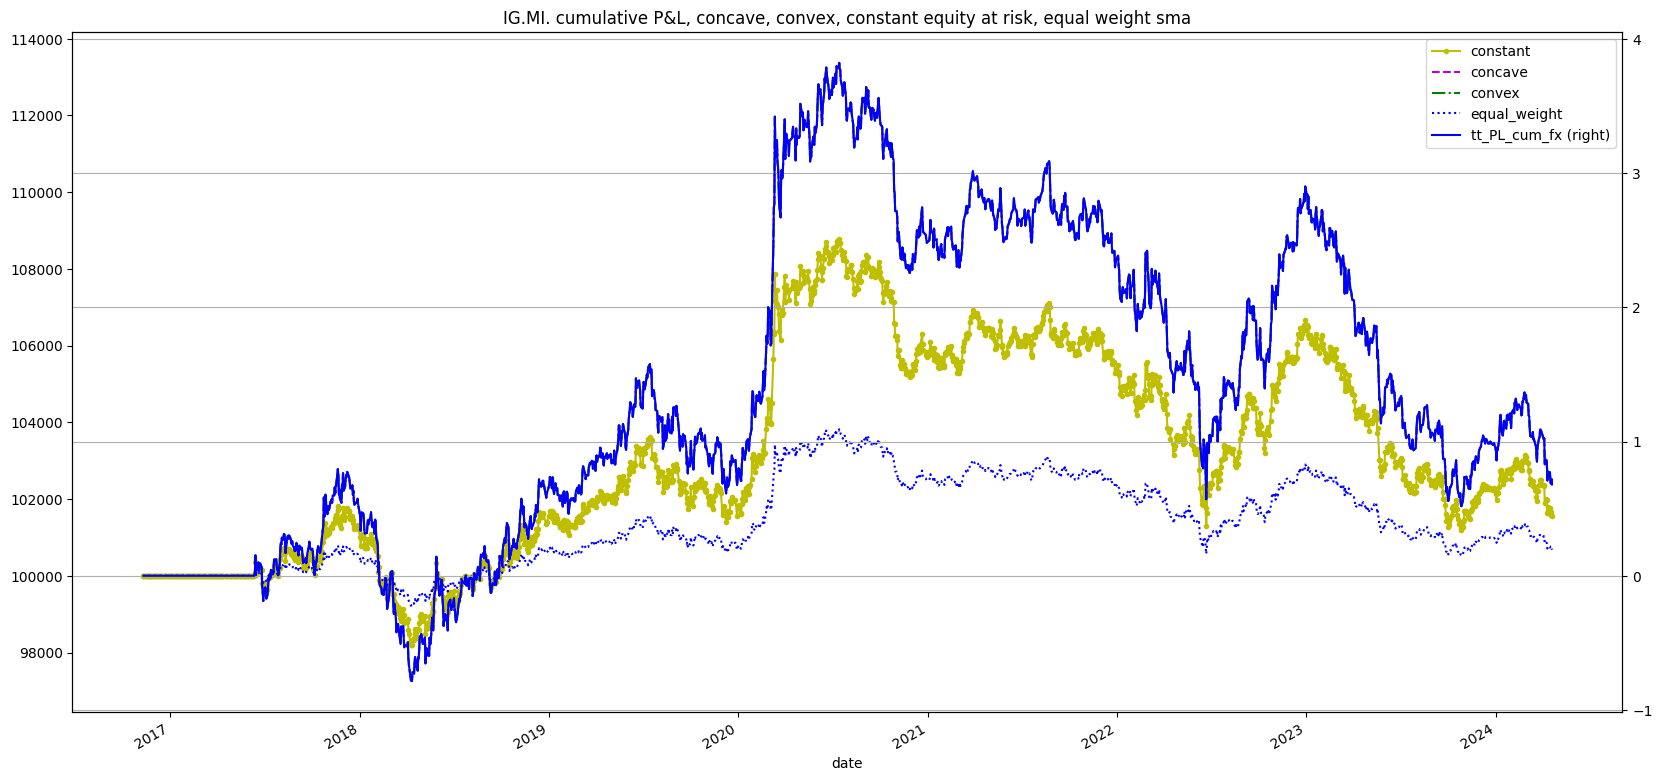

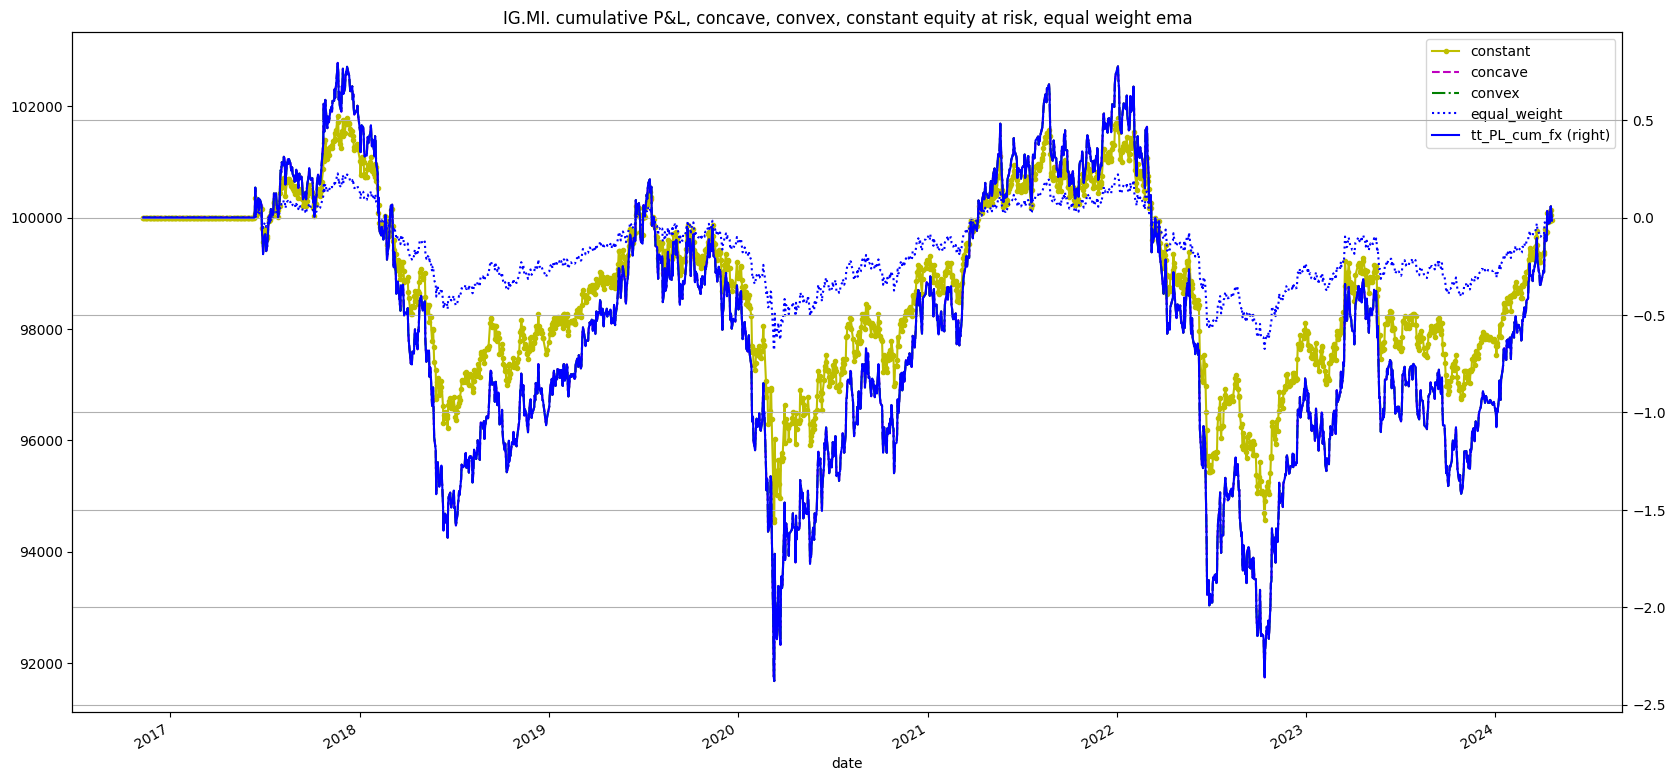

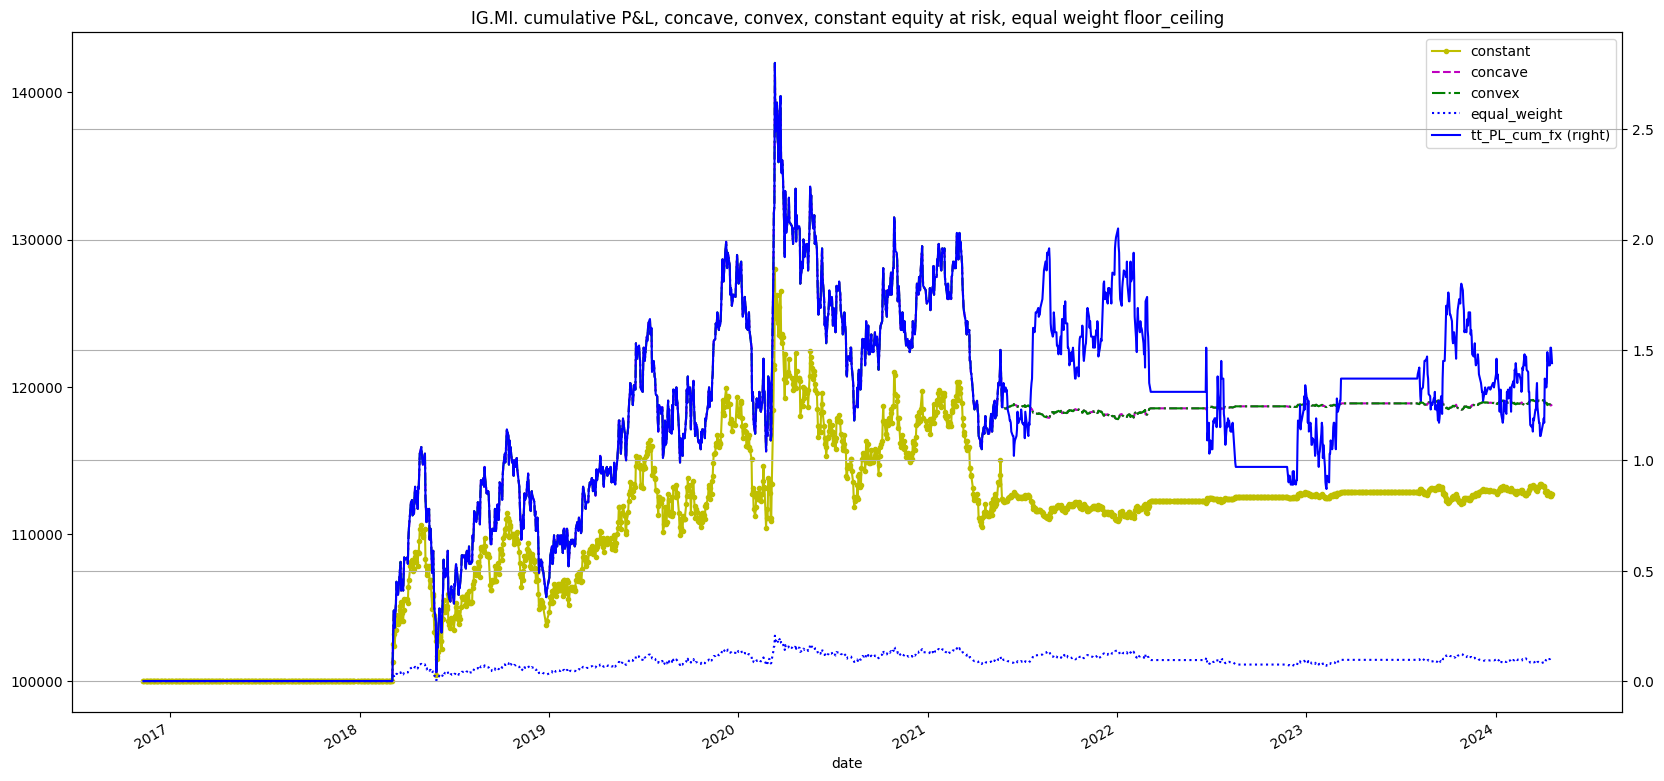

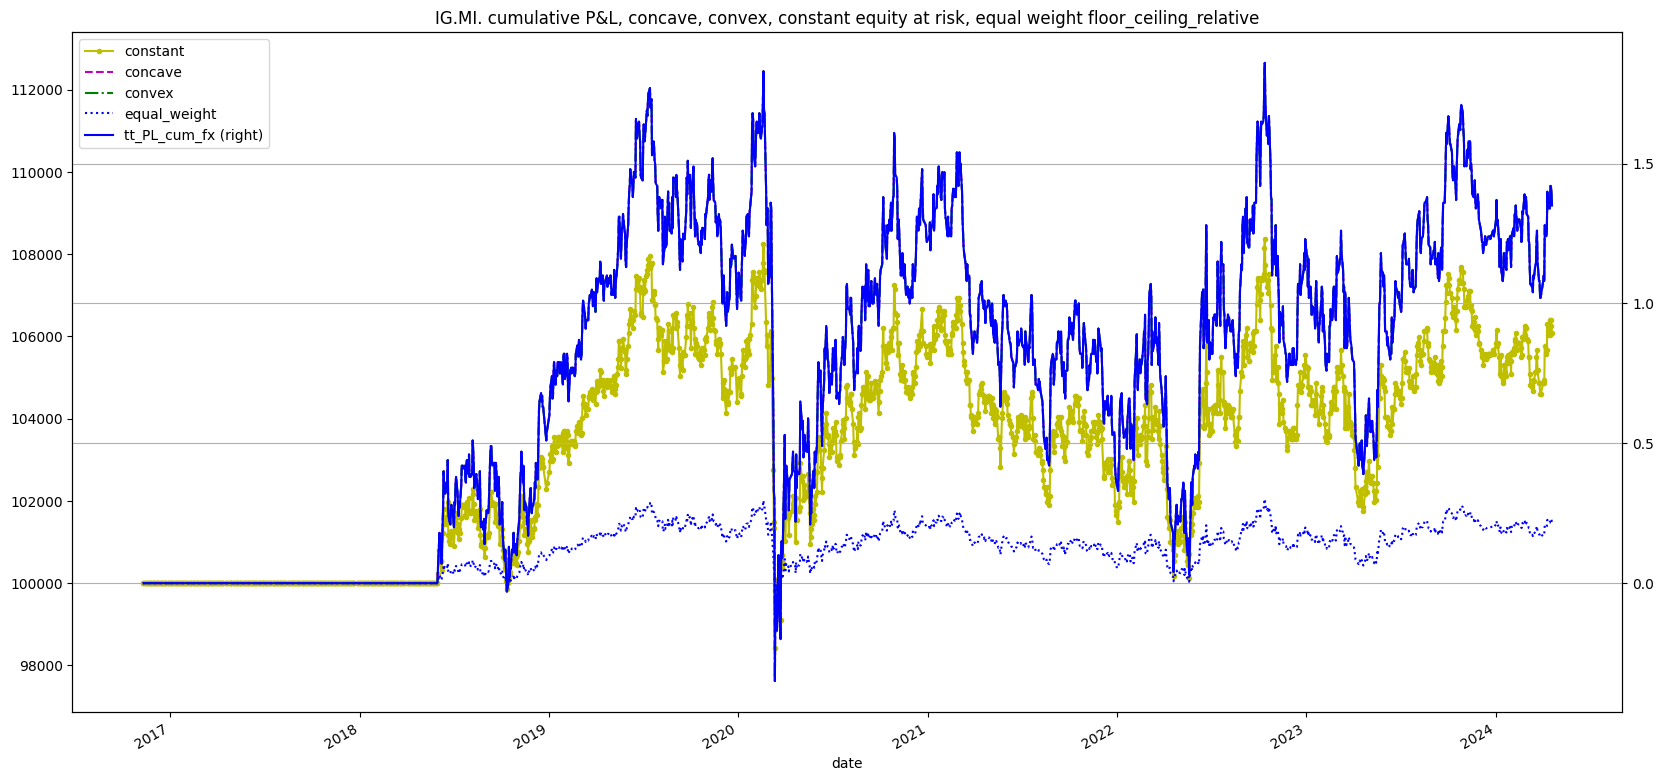

In [32]:
for i in range(len(signal)):  
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    # print(df.tail())
    plot_equity_amount(df, ticker, m)

In [33]:
# # determining the name of the file
# file_name = 'A2A_unt.xlsx'
 
# # saving the excel
# df.to_excel(file_name)

output_df_sel = pd.concat(output_signals, axis=0)  
output_df_sel = output_df_sel[['method', 'shs_eql','shs_fxd','shs_ccv','shs_cvx']]
output_df_sel.groupby('method').last() 

shs_eql  shs_fxd  shs_ccv  shs_cvx
method                                                    
breakout                 -900.0   1700.0   2600.0   2600.0
ema                      -900.0   2300.0   3500.0   3500.0
floor_ceiling           -1000.0  -1900.0  -1000.0  -1000.0
floor_ceiling_relative  -1000.0   4500.0   6800.0   6800.0
sma                      -900.0   2300.0   3500.0   3500.0
turtle                   -900.0  -1200.0  -1700.0  -1100.0

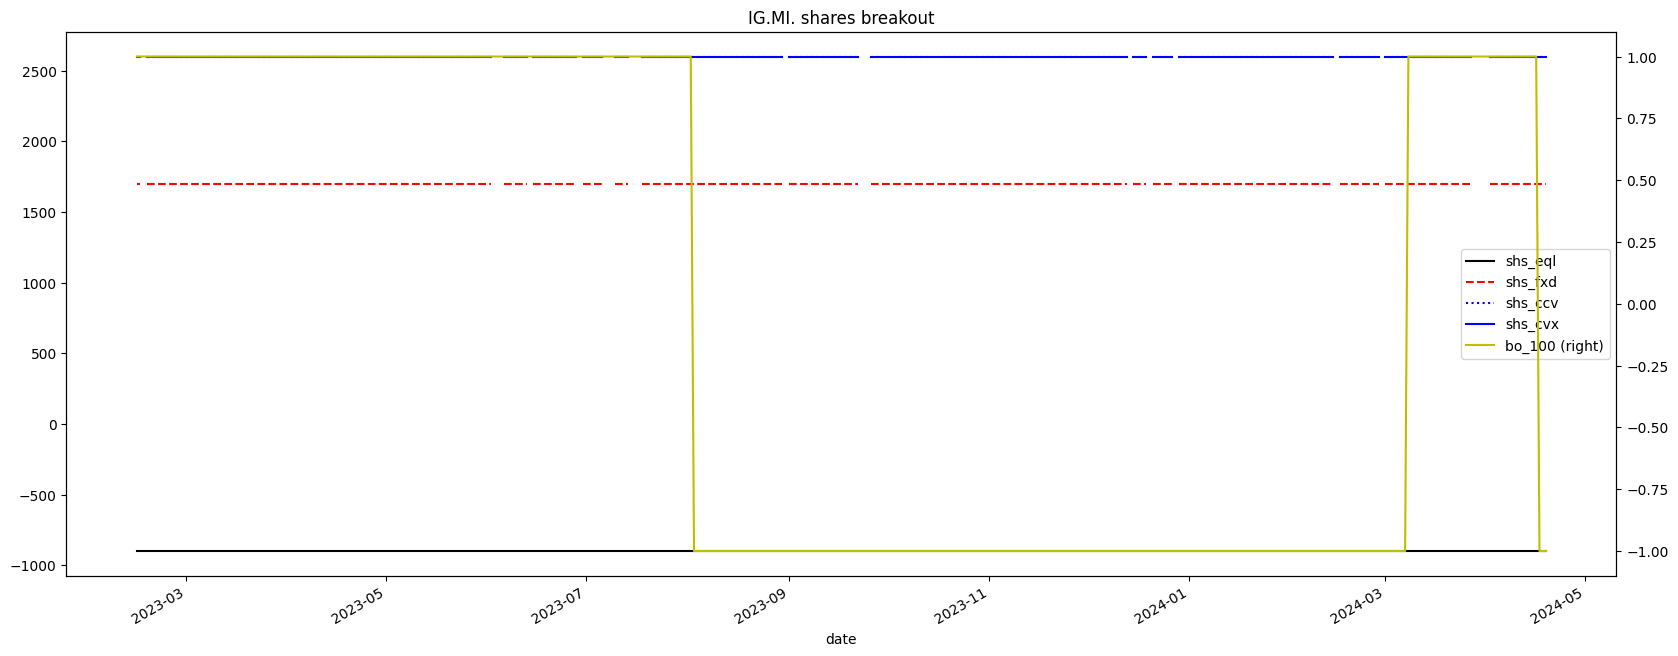

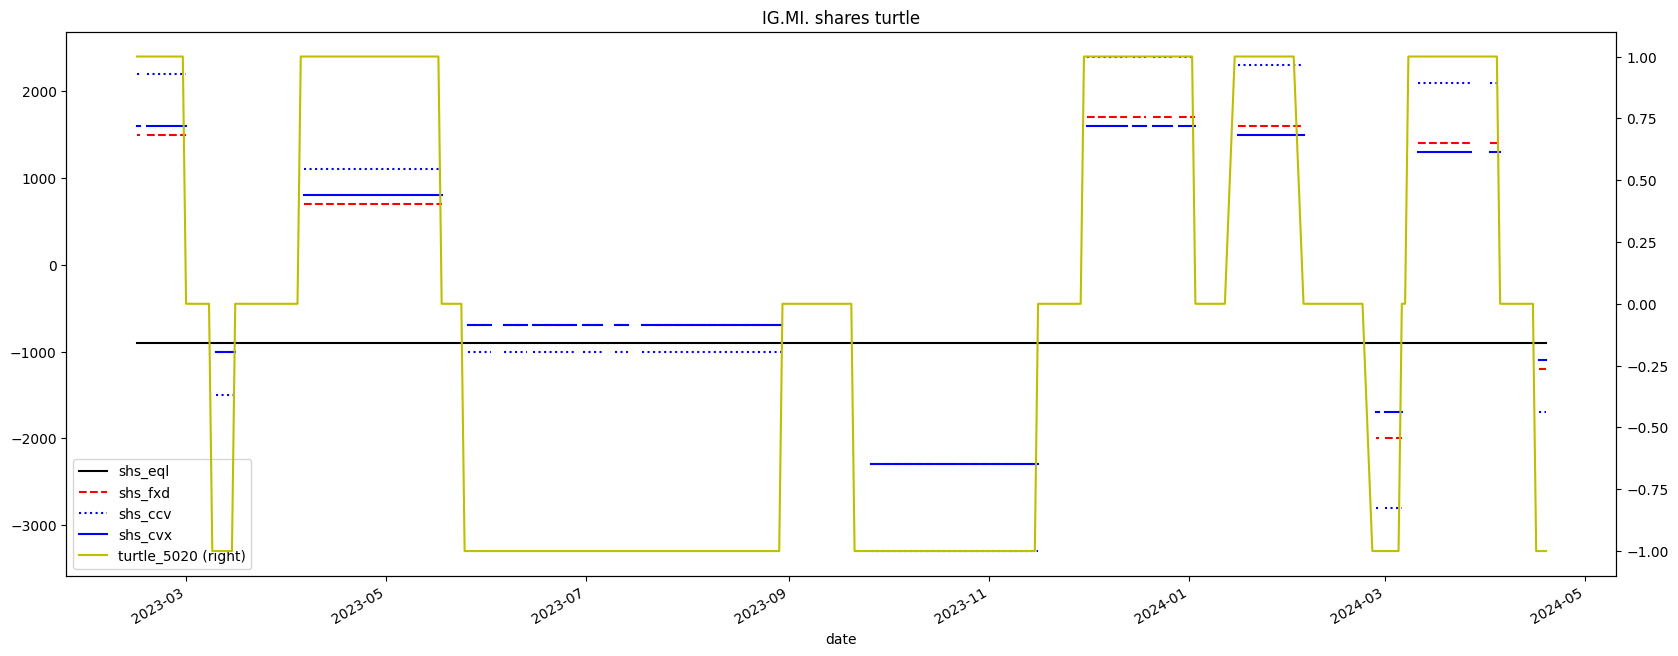

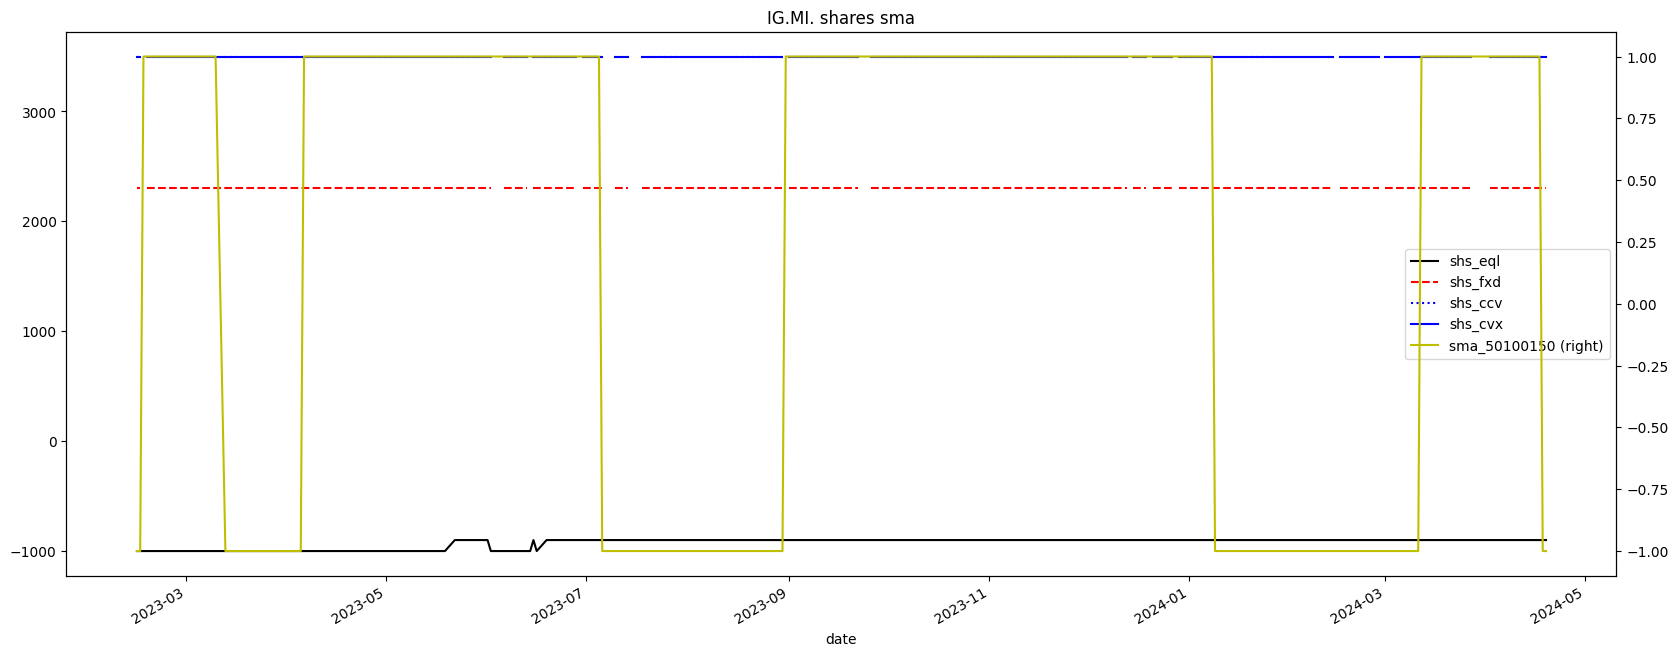

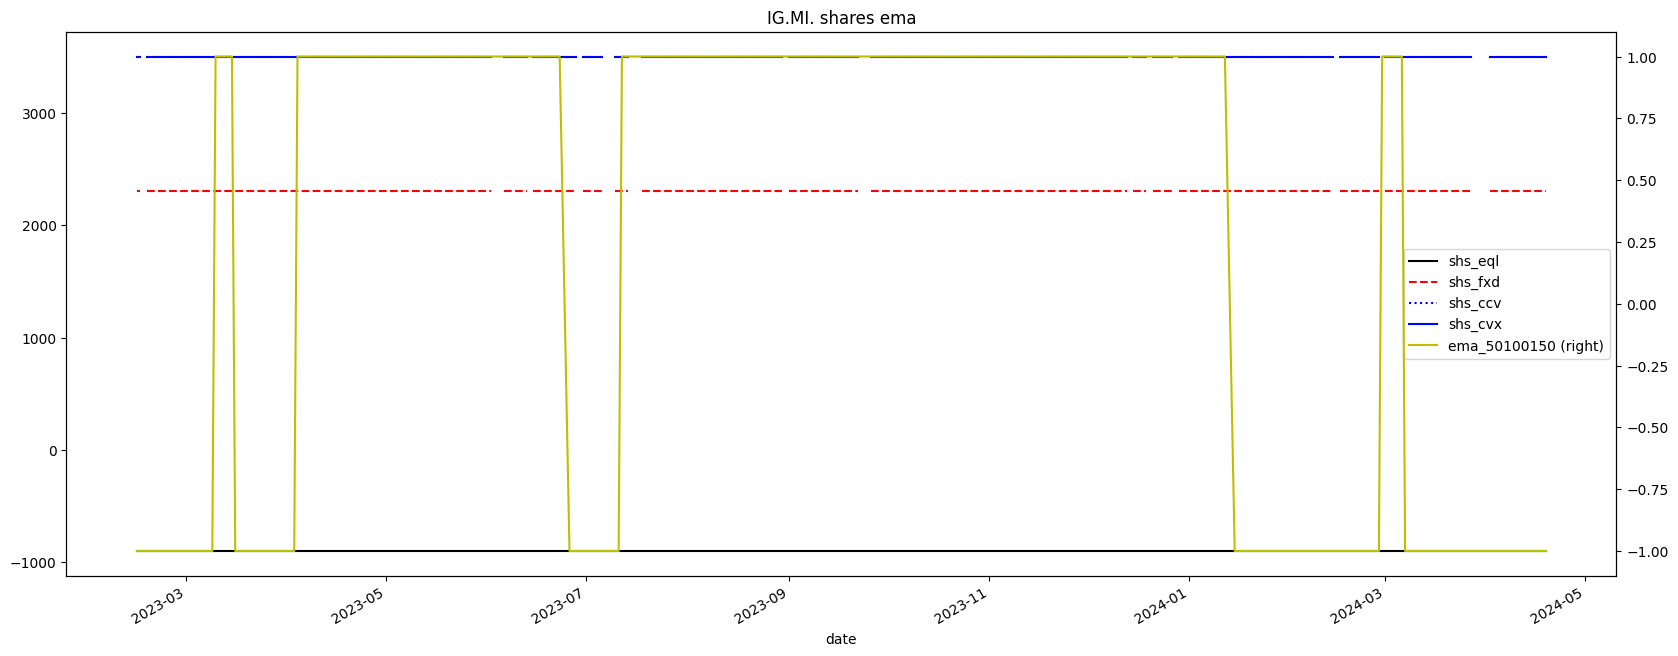

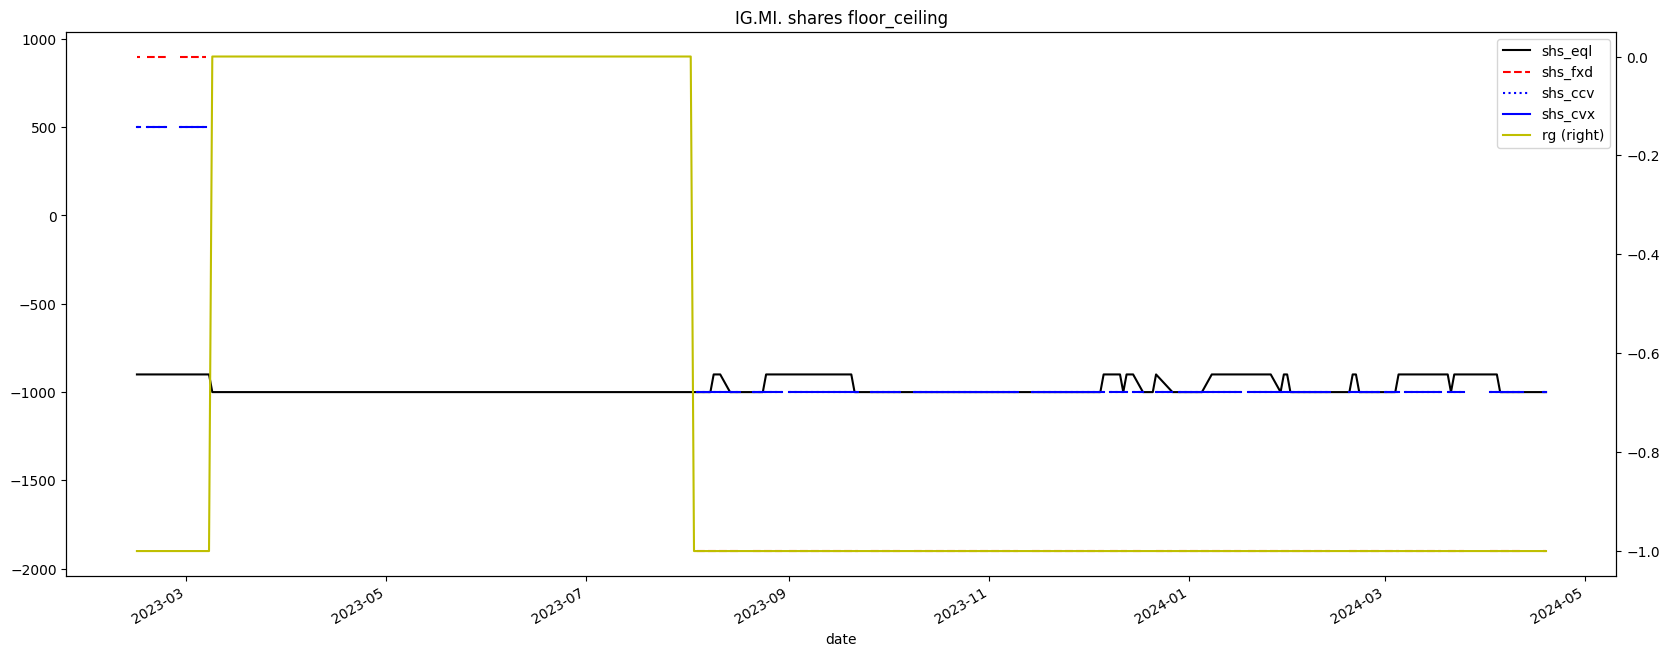

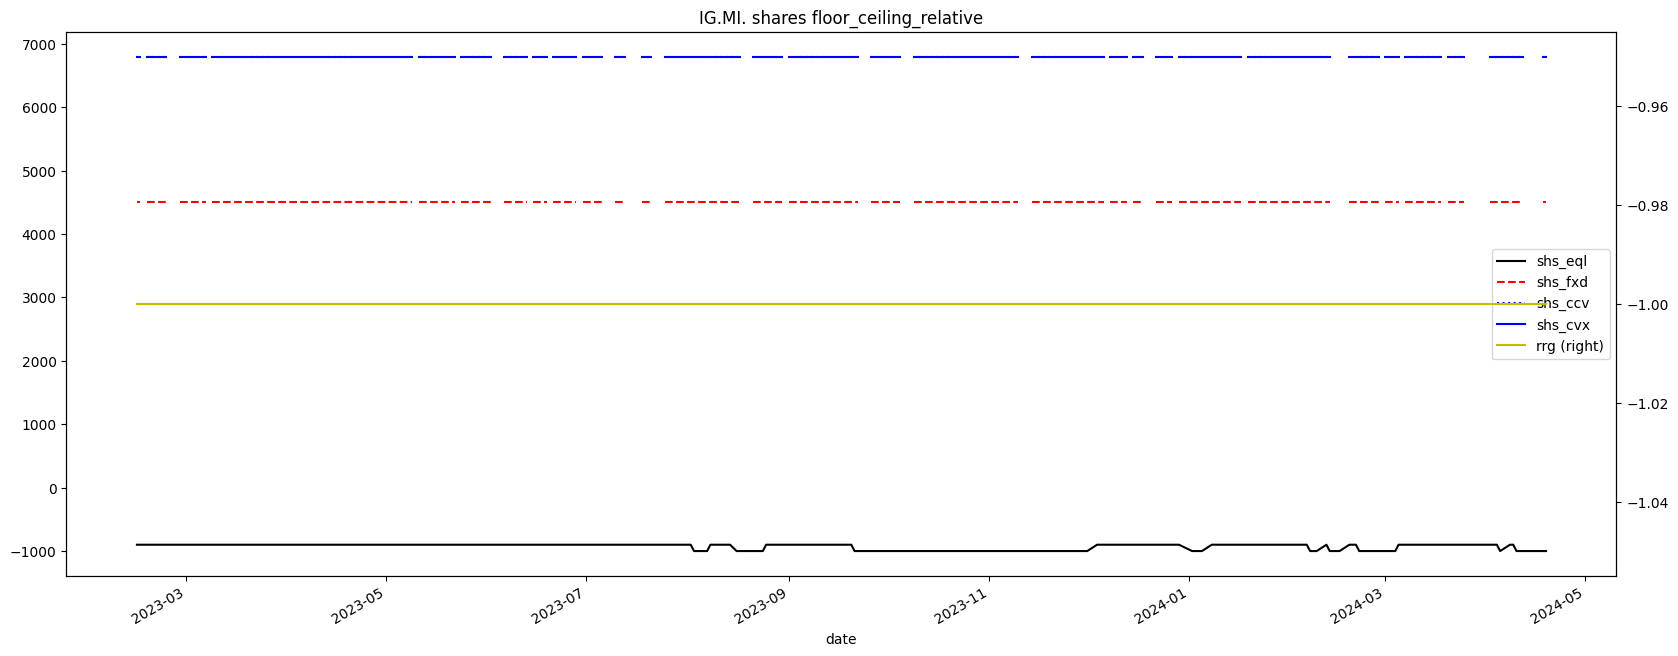

In [34]:
def plot_shares_signal(df, ticker, signal, m):
    df[['shs_eql','shs_fxd','shs_ccv','shs_cvx', signal]].plot(secondary_y=[signal],figsize=(20,8),style= ['k','r--','b:','b', 'y'],
                                                         title= str(ticker)+' shares ' + str(m))
    plt.show()
    
for i in range(len(signal)):  
    # print(i)
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    plot_shares_signal(output_signals[i].tail(300), ticker, signal[i], method[i])
